### Import LIB

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('resale-flat-prices-singapore (1).csv')
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
21318,2018-01,WOODLANDS,4 ROOM,668,WOODLANDS RING RD,10 TO 12,91.0,Model A,2000,81 years 09 months,365000.0
35122,2018-09,CENTRAL AREA,5 ROOM,1A,CANTONMENT RD,04 TO 06,106.0,Type S2,2011,91 years 04 months,970000.0
19227,2017-12,CLEMENTI,3 ROOM,427,CLEMENTI AVE 3,07 TO 09,67.0,New Generation,1978,59 years 05 months,370000.0
49579,2019-05,PUNGGOL,5 ROOM,175B,PUNGGOL FIELD,10 TO 12,110.0,Improved,2003,83 years 03 months,435000.0
6083,2017-05,BEDOK,3 ROOM,525,BEDOK NTH ST 3,10 TO 12,67.0,New Generation,1979,61 years 02 months,295000.0
30181,2018-07,BEDOK,3 ROOM,533,BEDOK NTH ST 3,04 TO 06,68.0,New Generation,1980,60 years 06 months,270000.0
23245,2018-03,HOUGANG,3 ROOM,623,HOUGANG AVE 8,07 TO 09,69.0,Improved,1985,66 years 06 months,285000.0
6216,2017-05,BUKIT BATOK,3 ROOM,251,BT BATOK EAST AVE 5,01 TO 03,67.0,New Generation,1985,66 years 11 months,258000.0
39631,2018-11,PUNGGOL,4 ROOM,612B,PUNGGOL DR,04 TO 06,93.0,Model A,2012,93 years 02 months,428000.0
2098,2017-02,TOA PAYOH,5 ROOM,153A,LOR 1 TOA PAYOH,07 TO 09,121.0,Improved,1999,80 years 11 months,848888.0


In [10]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
df.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
50427,2019-05,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,68 years 01 month,540000.0
50428,2019-05,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,68 years 02 months,555000.0
50429,2019-05,YISHUN,EXECUTIVE,724,YISHUN ST 71,04 TO 06,145.0,Apartment,1986,66 years 02 months,508000.0
50430,2019-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,67 years 07 months,588000.0
50431,2019-05,YISHUN,MULTI-GENERATION,605,YISHUN ST 61,07 TO 09,159.0,Multi Generation,1988,67 years 08 months,718000.0


In [13]:
df.shape

(50432, 11)

In [14]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [16]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
month,50432,29,2018-07,2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
town,50432,26,WOODLANDS,3910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flat_type,50432,7,4 ROOM,20871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block,50432,2299,2,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,50432,533,YISHUN RING RD,771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
storey_range,50432,17,04 TO 06,11677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_area_sqm,50432.0,NaN,NaN,NaN,97.944208,24.233911,31.0,82.0,96.0,113.0,249.0
flat_model,50432,20,Model A,15979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lease_commence_date,50432.0,NaN,NaN,NaN,1993.255433,12.155258,1966.0,1984.0,1993.0,2002.0,2016.0
remaining_lease,50432,603,95 years 02 months,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
num_cols=df.select_dtypes(include=['int','float'])

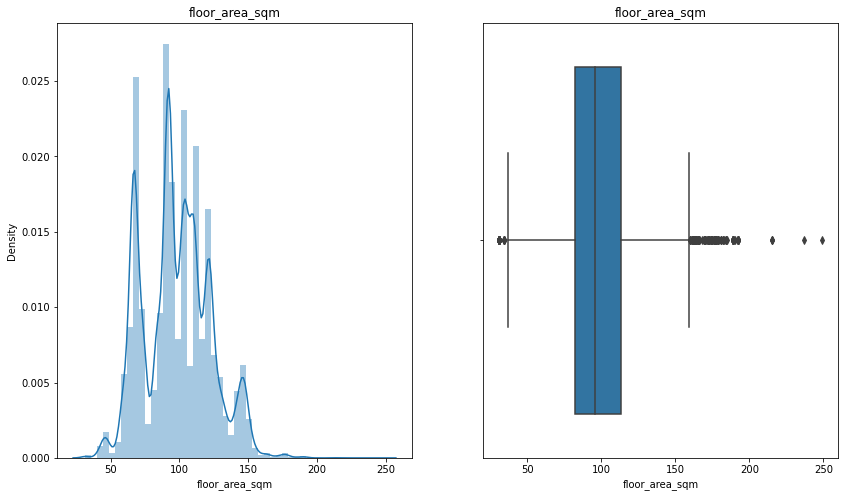

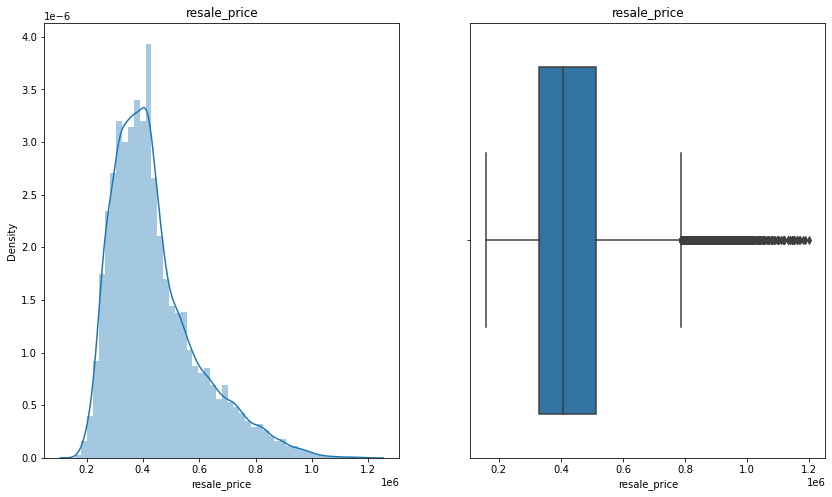

In [28]:
for i,var in enumerate(num_cols.columns):
    fig,ax=plt.subplots(1,2,figsize=(14,8))
    sns.distplot(df[var],ax=ax[0]).set_title(var)
    sns.boxplot(df[var],ax=ax[1]).set_title(var)

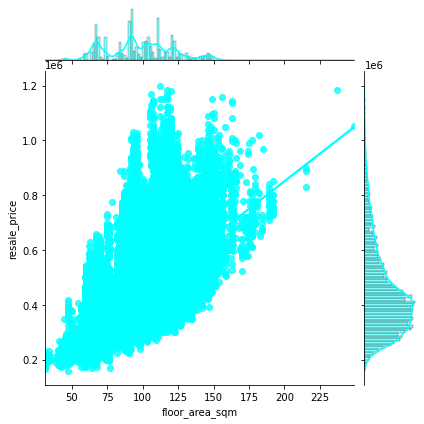

In [41]:
sns.jointplot(df['floor_area_sqm'],df['resale_price'],kind='reg',color='cyan')

In [44]:
from datetime import datetime
df['month']=df['month'].apply(lambda x: datetime.strptime(x,"%Y-%m"))

In [87]:
remaining_years = df.remaining_lease.apply(lambda x: int(x[0:2]))

In [88]:
minus=(df['month'].apply(lambda x: x.year) -  df['lease_commence_date']) + remaining_years 

In [92]:
minus.value_counts()

99     28579
98     21794
100       59
dtype: int64

In [98]:
cat_cols=df.select_dtypes(include='object').columns

In [102]:
encoder=LabelEncoder()
for i in cat_cols:
    df[i]=encoder.fit_transform(df[i])

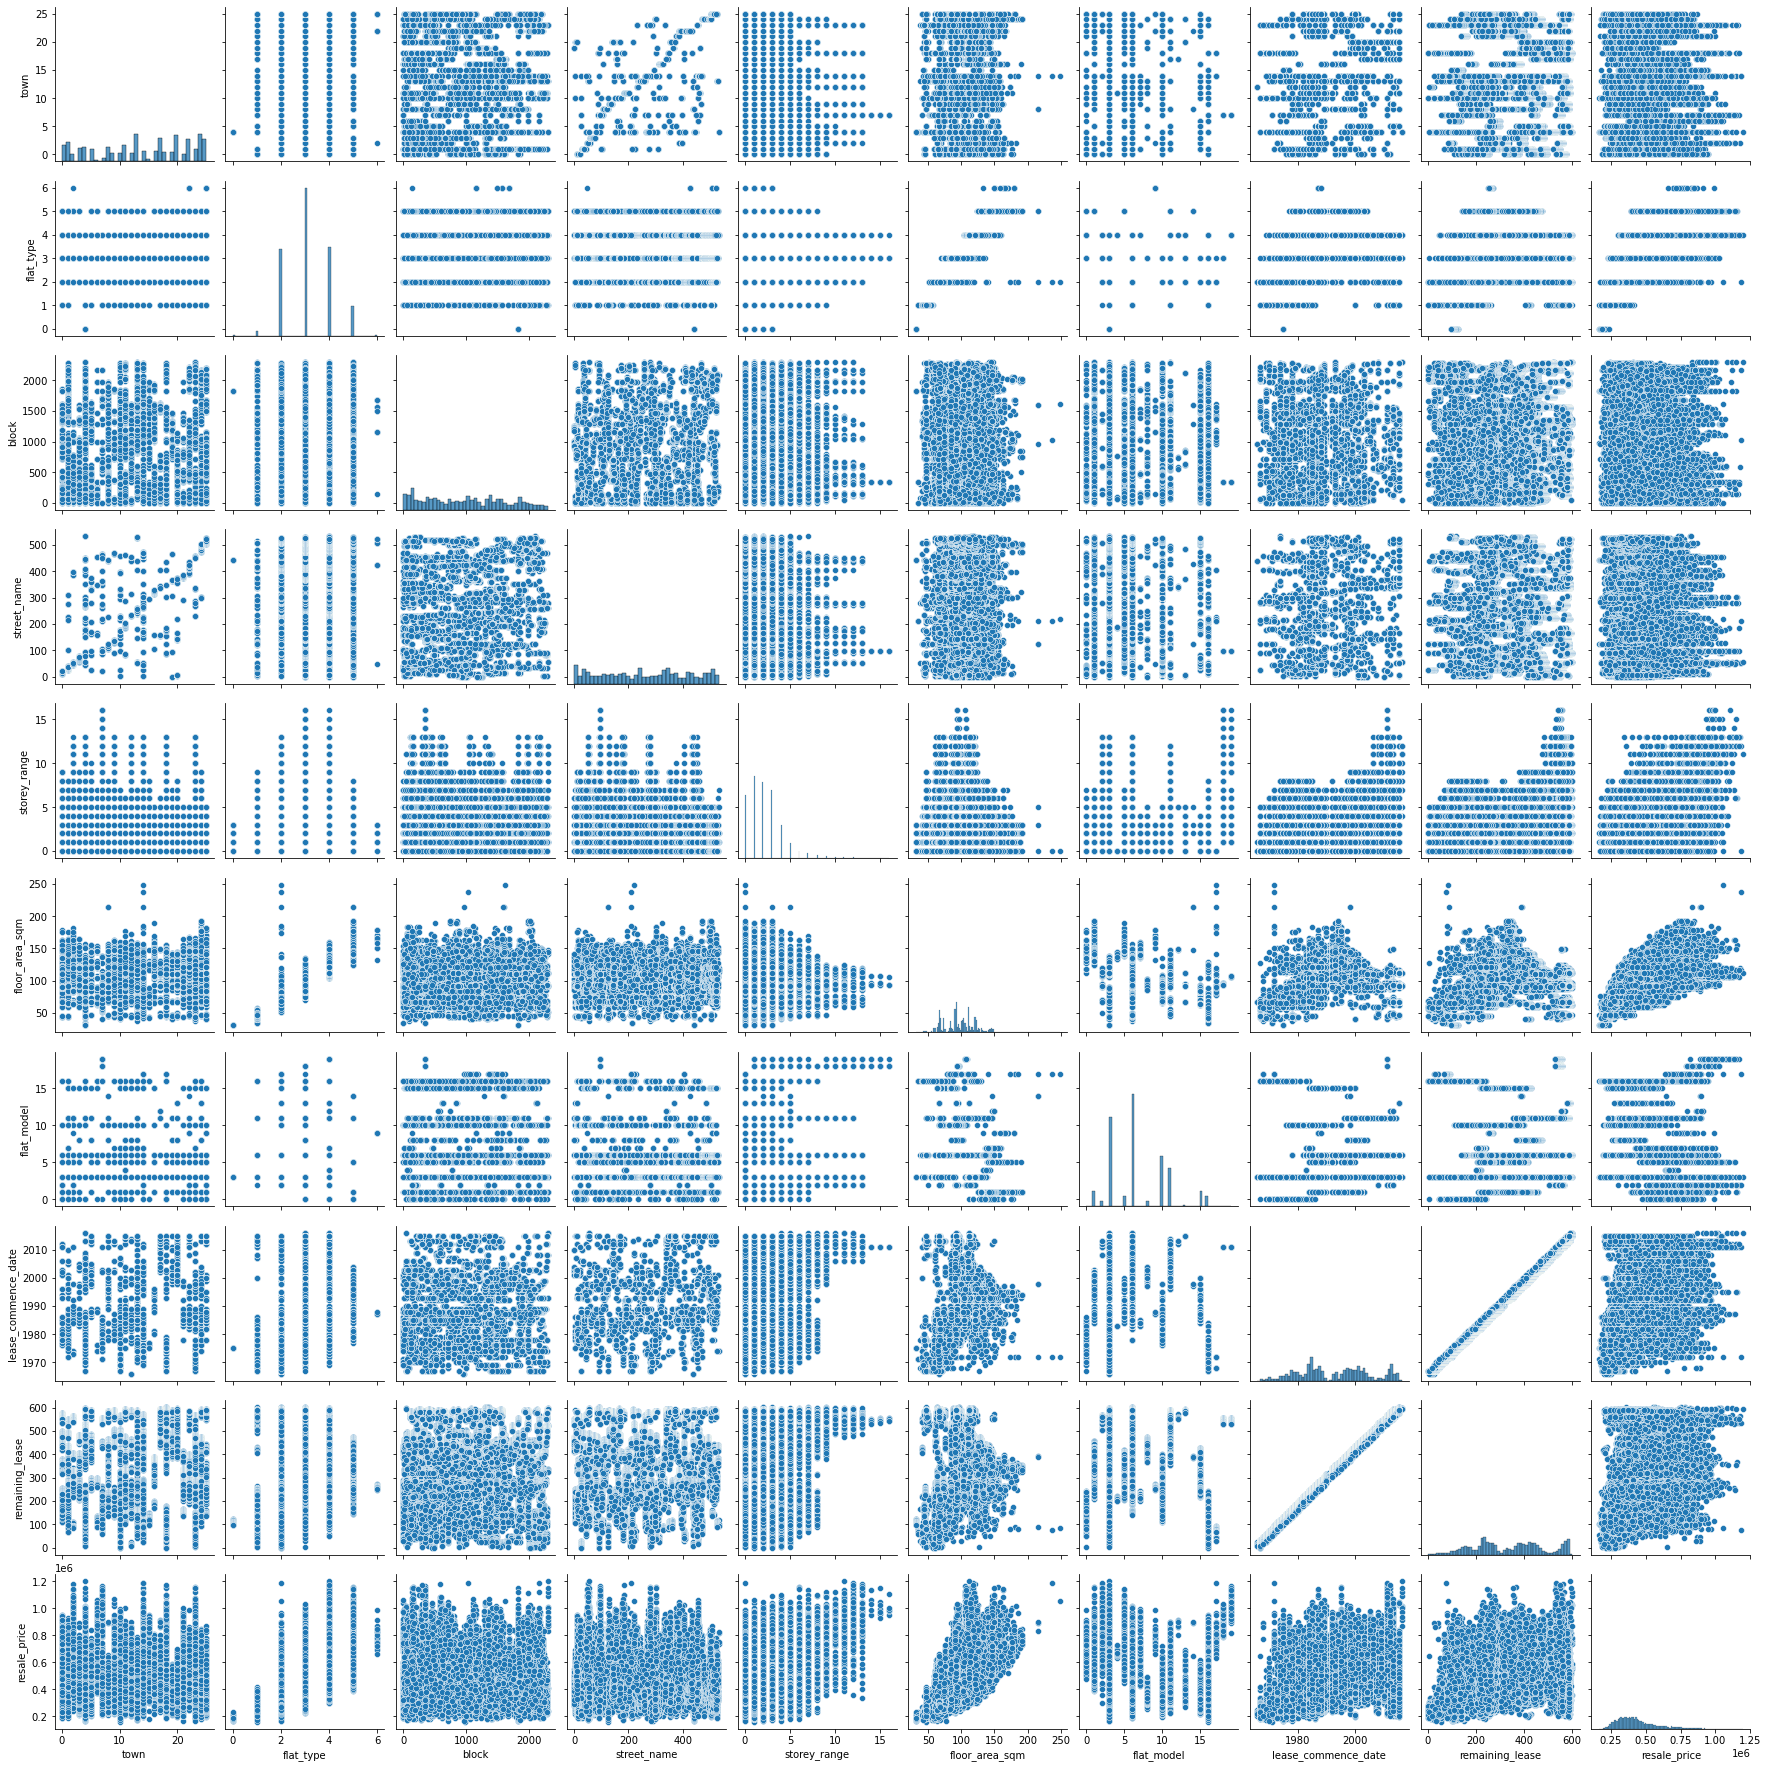

In [105]:
sns.pairplot(df)

In [107]:
df.dtypes

month                  datetime64[ns]
town                            int32
flat_type                       int32
block                           int32
street_name                     int32
storey_range                    int32
floor_area_sqm                float64
flat_model                      int32
lease_commence_date             int64
remaining_lease                 int32
resale_price                  float64
dtype: object

In [110]:
df.drop(['month','remaining_lease'],axis=1,inplace=True)

In [112]:
y=df[['resale_price']]
x=df.iloc[:,:-1]  

In [115]:
dt=DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=5,max_depth=3,)
lr=LinearRegression()
br=BaggingRegressor(n_estimators=100, bootstrap_features=True)
rf=RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=5,max_depth=3,)
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,min_samples_split=2, min_samples_leaf=5,max_depth=3)
xg=XGBRegressor()
cb=CatBoostRegressor()
lb=LGBMRegressor()

In [119]:
model=[]
model.append(("DecisionTree",dt))
model.append(("linearRegressor",lr))
model.append(("Bagging",br))
model.append(("RandomForest",rf))
model.append(("GradientBoost",gb))
model.append(("XGB",xg))
model.append(("catboost",cb))
model.append(("LGB",lb))

In [127]:
results=[]
names=[]

In [130]:
for name,mod in model:
    cv=KFold(n_splits=10)
    result=cross_val_score(mod,x,y,cv=cv)
    results.append(result)
    names.append(name)
    msg="%s: %f (%f)" % (name,result.mean(),result.std())
    print(msg)

DecisionTree: 0.489152 (0.011860)
linearRegressor: 0.571641 (0.007664)
Bagging: 0.964004 (0.004677)
RandomForest: 0.506648 (0.012547)
GradientBoost: 0.839409 (0.007625)
XGB: 0.960738 (0.004103)
Learning rate set to 0.076973
0:	learn: 147744.8781797	total: 163ms	remaining: 2m 42s
1:	learn: 141598.8107670	total: 176ms	remaining: 1m 27s
2:	learn: 135864.9900215	total: 188ms	remaining: 1m 2s
3:	learn: 130877.6618702	total: 199ms	remaining: 49.6s
4:	learn: 125961.1738155	total: 211ms	remaining: 41.9s
5:	learn: 121763.2624293	total: 222ms	remaining: 36.8s
6:	learn: 117809.8036379	total: 234ms	remaining: 33.2s
7:	learn: 114237.2334904	total: 246ms	remaining: 30.5s
8:	learn: 111037.2127894	total: 257ms	remaining: 28.3s
9:	learn: 108209.6851097	total: 268ms	remaining: 26.6s
10:	learn: 105774.4340864	total: 280ms	remaining: 25.1s
11:	learn: 103406.1840809	total: 291ms	remaining: 24s
12:	learn: 101253.3397647	total: 302ms	remaining: 23s
13:	learn: 99315.1451600	total: 314ms	remaining: 22.1s
14:	l

150:	learn: 48026.4482810	total: 2.02s	remaining: 11.3s
151:	learn: 47969.3350857	total: 2.03s	remaining: 11.3s
152:	learn: 47871.6586709	total: 2.04s	remaining: 11.3s
153:	learn: 47793.0539829	total: 2.06s	remaining: 11.3s
154:	learn: 47692.4130507	total: 2.07s	remaining: 11.3s
155:	learn: 47526.5604777	total: 2.08s	remaining: 11.3s
156:	learn: 47347.3666833	total: 2.1s	remaining: 11.3s
157:	learn: 47266.7400915	total: 2.11s	remaining: 11.2s
158:	learn: 47131.4274554	total: 2.12s	remaining: 11.2s
159:	learn: 47028.7354908	total: 2.13s	remaining: 11.2s
160:	learn: 46962.0669043	total: 2.14s	remaining: 11.2s
161:	learn: 46806.2875633	total: 2.15s	remaining: 11.1s
162:	learn: 46700.9790712	total: 2.16s	remaining: 11.1s
163:	learn: 46622.3753651	total: 2.18s	remaining: 11.1s
164:	learn: 46518.3078475	total: 2.19s	remaining: 11.1s
165:	learn: 46458.6703625	total: 2.2s	remaining: 11.1s
166:	learn: 46379.7239083	total: 2.25s	remaining: 11.2s
167:	learn: 46345.8492467	total: 2.26s	remaining: 

301:	learn: 38229.2360702	total: 3.88s	remaining: 8.97s
302:	learn: 38197.1051989	total: 3.9s	remaining: 8.96s
303:	learn: 38170.0321237	total: 3.91s	remaining: 8.95s
304:	learn: 38145.7808934	total: 3.92s	remaining: 8.93s
305:	learn: 38098.5888372	total: 3.93s	remaining: 8.92s
306:	learn: 38085.1748302	total: 3.94s	remaining: 8.9s
307:	learn: 38017.8831323	total: 3.96s	remaining: 8.89s
308:	learn: 37958.4714838	total: 3.97s	remaining: 8.88s
309:	learn: 37888.0090772	total: 3.98s	remaining: 8.86s
310:	learn: 37836.6755062	total: 3.99s	remaining: 8.85s
311:	learn: 37812.1743818	total: 4s	remaining: 8.83s
312:	learn: 37784.8990755	total: 4.02s	remaining: 8.82s
313:	learn: 37748.9529562	total: 4.03s	remaining: 8.8s
314:	learn: 37694.6294045	total: 4.04s	remaining: 8.79s
315:	learn: 37649.9893098	total: 4.05s	remaining: 8.78s
316:	learn: 37639.8721383	total: 4.07s	remaining: 8.76s
317:	learn: 37617.5759850	total: 4.08s	remaining: 8.75s
318:	learn: 37601.1368727	total: 4.09s	remaining: 8.74

450:	learn: 34046.9533406	total: 5.69s	remaining: 6.92s
451:	learn: 34035.9086169	total: 5.7s	remaining: 6.91s
452:	learn: 34003.5215300	total: 5.71s	remaining: 6.9s
453:	learn: 33979.5029765	total: 5.73s	remaining: 6.89s
454:	learn: 33968.8729462	total: 5.74s	remaining: 6.87s
455:	learn: 33945.5869537	total: 5.75s	remaining: 6.86s
456:	learn: 33923.5684633	total: 5.76s	remaining: 6.85s
457:	learn: 33883.1891188	total: 5.77s	remaining: 6.83s
458:	learn: 33858.4935834	total: 5.79s	remaining: 6.82s
459:	learn: 33838.1070782	total: 5.8s	remaining: 6.8s
460:	learn: 33795.9224556	total: 5.81s	remaining: 6.79s
461:	learn: 33770.0359329	total: 5.82s	remaining: 6.78s
462:	learn: 33752.6403827	total: 5.83s	remaining: 6.76s
463:	learn: 33737.4698494	total: 5.84s	remaining: 6.75s
464:	learn: 33700.6521985	total: 5.86s	remaining: 6.74s
465:	learn: 33686.8110837	total: 5.87s	remaining: 6.72s
466:	learn: 33671.7544638	total: 5.88s	remaining: 6.71s
467:	learn: 33659.8897909	total: 5.89s	remaining: 6.

604:	learn: 31592.5034729	total: 7.53s	remaining: 4.91s
605:	learn: 31582.8719113	total: 7.54s	remaining: 4.9s
606:	learn: 31568.5957197	total: 7.55s	remaining: 4.89s
607:	learn: 31561.6136330	total: 7.57s	remaining: 4.88s
608:	learn: 31556.1601822	total: 7.58s	remaining: 4.86s
609:	learn: 31547.6449063	total: 7.59s	remaining: 4.85s
610:	learn: 31516.4627347	total: 7.6s	remaining: 4.84s
611:	learn: 31508.1524048	total: 7.61s	remaining: 4.83s
612:	learn: 31495.3998449	total: 7.62s	remaining: 4.81s
613:	learn: 31484.6477073	total: 7.63s	remaining: 4.8s
614:	learn: 31467.9363340	total: 7.65s	remaining: 4.79s
615:	learn: 31447.3410275	total: 7.66s	remaining: 4.77s
616:	learn: 31437.6390574	total: 7.67s	remaining: 4.76s
617:	learn: 31426.5260912	total: 7.68s	remaining: 4.75s
618:	learn: 31419.9471121	total: 7.69s	remaining: 4.74s
619:	learn: 31406.9127857	total: 7.71s	remaining: 4.72s
620:	learn: 31385.5869410	total: 7.72s	remaining: 4.71s
621:	learn: 31374.1846471	total: 7.73s	remaining: 4

757:	learn: 30005.3703181	total: 9.51s	remaining: 3.03s
758:	learn: 30000.2844264	total: 9.52s	remaining: 3.02s
759:	learn: 29992.2528854	total: 9.54s	remaining: 3.01s
760:	learn: 29980.3997821	total: 9.55s	remaining: 3s
761:	learn: 29961.5259725	total: 9.56s	remaining: 2.99s
762:	learn: 29948.7246824	total: 9.58s	remaining: 2.98s
763:	learn: 29941.5960904	total: 9.59s	remaining: 2.96s
764:	learn: 29933.0559444	total: 9.6s	remaining: 2.95s
765:	learn: 29922.6527089	total: 9.62s	remaining: 2.94s
766:	learn: 29910.1653393	total: 9.63s	remaining: 2.92s
767:	learn: 29904.9631459	total: 9.64s	remaining: 2.91s
768:	learn: 29900.1939502	total: 9.65s	remaining: 2.9s
769:	learn: 29886.6884206	total: 9.67s	remaining: 2.89s
770:	learn: 29881.4557029	total: 9.68s	remaining: 2.88s
771:	learn: 29869.6207958	total: 9.69s	remaining: 2.86s
772:	learn: 29863.1256758	total: 9.71s	remaining: 2.85s
773:	learn: 29851.2020395	total: 9.72s	remaining: 2.84s
774:	learn: 29839.9052700	total: 9.73s	remaining: 2.8

907:	learn: 28763.6142163	total: 11.5s	remaining: 1.16s
908:	learn: 28754.7916890	total: 11.5s	remaining: 1.15s
909:	learn: 28747.2076687	total: 11.5s	remaining: 1.14s
910:	learn: 28741.7577567	total: 11.5s	remaining: 1.13s
911:	learn: 28730.6672934	total: 11.5s	remaining: 1.11s
912:	learn: 28726.1545753	total: 11.6s	remaining: 1.1s
913:	learn: 28716.0994109	total: 11.6s	remaining: 1.09s
914:	learn: 28709.3048040	total: 11.6s	remaining: 1.07s
915:	learn: 28701.0422144	total: 11.6s	remaining: 1.06s
916:	learn: 28696.6674015	total: 11.6s	remaining: 1.05s
917:	learn: 28695.1076426	total: 11.6s	remaining: 1.04s
918:	learn: 28690.0701097	total: 11.6s	remaining: 1.02s
919:	learn: 28685.2899287	total: 11.6s	remaining: 1.01s
920:	learn: 28677.1151176	total: 11.6s	remaining: 999ms
921:	learn: 28672.3285439	total: 11.7s	remaining: 986ms
922:	learn: 28667.6777255	total: 11.7s	remaining: 974ms
923:	learn: 28663.2842969	total: 11.7s	remaining: 961ms
924:	learn: 28652.5482571	total: 11.7s	remaining:

56:	learn: 67817.5232724	total: 779ms	remaining: 12.9s
57:	learn: 67411.9809596	total: 798ms	remaining: 13s
58:	learn: 66847.7626624	total: 814ms	remaining: 13s
59:	learn: 66483.2171666	total: 829ms	remaining: 13s
60:	learn: 66124.2939408	total: 845ms	remaining: 13s
61:	learn: 65745.2997187	total: 858ms	remaining: 13s
62:	learn: 65584.8235329	total: 871ms	remaining: 12.9s
63:	learn: 65311.1831378	total: 884ms	remaining: 12.9s
64:	learn: 64976.4765116	total: 898ms	remaining: 12.9s
65:	learn: 64733.9660462	total: 911ms	remaining: 12.9s
66:	learn: 64421.7159649	total: 924ms	remaining: 12.9s
67:	learn: 64148.7828663	total: 937ms	remaining: 12.8s
68:	learn: 63720.5766434	total: 956ms	remaining: 12.9s
69:	learn: 63623.6464276	total: 969ms	remaining: 12.9s
70:	learn: 63552.1000068	total: 982ms	remaining: 12.9s
71:	learn: 63251.4434839	total: 995ms	remaining: 12.8s
72:	learn: 62960.7552165	total: 1.01s	remaining: 12.8s
73:	learn: 62652.2338405	total: 1.02s	remaining: 12.8s
74:	learn: 62210.727

218:	learn: 42222.9778753	total: 3.15s	remaining: 11.3s
219:	learn: 42166.5767573	total: 3.17s	remaining: 11.2s
220:	learn: 42084.1727949	total: 3.18s	remaining: 11.2s
221:	learn: 42029.1224235	total: 3.2s	remaining: 11.2s
222:	learn: 41938.7213956	total: 3.21s	remaining: 11.2s
223:	learn: 41891.4746099	total: 3.23s	remaining: 11.2s
224:	learn: 41857.5162714	total: 3.24s	remaining: 11.2s
225:	learn: 41756.3896832	total: 3.26s	remaining: 11.2s
226:	learn: 41631.4010610	total: 3.27s	remaining: 11.2s
227:	learn: 41599.2849351	total: 3.29s	remaining: 11.1s
228:	learn: 41543.8025567	total: 3.31s	remaining: 11.1s
229:	learn: 41487.8203465	total: 3.32s	remaining: 11.1s
230:	learn: 41454.9639775	total: 3.34s	remaining: 11.1s
231:	learn: 41421.7359909	total: 3.35s	remaining: 11.1s
232:	learn: 41319.2249766	total: 3.37s	remaining: 11.1s
233:	learn: 41272.7081409	total: 3.38s	remaining: 11.1s
234:	learn: 41189.4078117	total: 3.4s	remaining: 11.1s
235:	learn: 41106.5568979	total: 3.41s	remaining: 

367:	learn: 36034.0008409	total: 5.32s	remaining: 9.14s
368:	learn: 36008.4514793	total: 5.34s	remaining: 9.13s
369:	learn: 35989.2095107	total: 5.36s	remaining: 9.12s
370:	learn: 35975.5008290	total: 5.37s	remaining: 9.11s
371:	learn: 35960.4493405	total: 5.39s	remaining: 9.1s
372:	learn: 35933.2104630	total: 5.4s	remaining: 9.08s
373:	learn: 35881.5098981	total: 5.42s	remaining: 9.07s
374:	learn: 35854.5631178	total: 5.43s	remaining: 9.05s
375:	learn: 35813.4607478	total: 5.45s	remaining: 9.04s
376:	learn: 35786.8648767	total: 5.46s	remaining: 9.03s
377:	learn: 35725.4085901	total: 5.48s	remaining: 9.02s
378:	learn: 35712.4049028	total: 5.49s	remaining: 9s
379:	learn: 35692.4094658	total: 5.51s	remaining: 8.99s
380:	learn: 35676.7794072	total: 5.52s	remaining: 8.98s
381:	learn: 35653.4238860	total: 5.54s	remaining: 8.96s
382:	learn: 35631.1503622	total: 5.55s	remaining: 8.94s
383:	learn: 35612.7672542	total: 5.56s	remaining: 8.92s
384:	learn: 35578.6588132	total: 5.58s	remaining: 8.9

521:	learn: 32773.1068648	total: 7.53s	remaining: 6.9s
522:	learn: 32755.1326638	total: 7.55s	remaining: 6.88s
523:	learn: 32740.3393820	total: 7.56s	remaining: 6.87s
524:	learn: 32728.6963930	total: 7.57s	remaining: 6.85s
525:	learn: 32717.4304021	total: 7.58s	remaining: 6.83s
526:	learn: 32704.0001144	total: 7.59s	remaining: 6.82s
527:	learn: 32686.7820626	total: 7.61s	remaining: 6.8s
528:	learn: 32683.5960638	total: 7.62s	remaining: 6.79s
529:	learn: 32668.0067026	total: 7.64s	remaining: 6.77s
530:	learn: 32650.8629767	total: 7.65s	remaining: 6.76s
531:	learn: 32630.0936238	total: 7.67s	remaining: 6.75s
532:	learn: 32609.2266882	total: 7.68s	remaining: 6.73s
533:	learn: 32593.4102512	total: 7.7s	remaining: 6.71s
534:	learn: 32578.1696775	total: 7.71s	remaining: 6.7s
535:	learn: 32563.8951384	total: 7.72s	remaining: 6.68s
536:	learn: 32558.2363740	total: 7.74s	remaining: 6.67s
537:	learn: 32554.0678258	total: 7.75s	remaining: 6.66s
538:	learn: 32538.0113581	total: 7.76s	remaining: 6.

669:	learn: 30863.9885724	total: 9.48s	remaining: 4.67s
670:	learn: 30855.0127117	total: 9.5s	remaining: 4.66s
671:	learn: 30836.2181683	total: 9.51s	remaining: 4.64s
672:	learn: 30828.9839845	total: 9.52s	remaining: 4.63s
673:	learn: 30817.3269221	total: 9.54s	remaining: 4.61s
674:	learn: 30797.5334353	total: 9.55s	remaining: 4.6s
675:	learn: 30787.3003705	total: 9.56s	remaining: 4.58s
676:	learn: 30771.9587601	total: 9.57s	remaining: 4.57s
677:	learn: 30764.9293235	total: 9.58s	remaining: 4.55s
678:	learn: 30756.7454339	total: 9.59s	remaining: 4.54s
679:	learn: 30745.1317000	total: 9.61s	remaining: 4.52s
680:	learn: 30730.3691533	total: 9.62s	remaining: 4.5s
681:	learn: 30723.2493369	total: 9.63s	remaining: 4.49s
682:	learn: 30706.0535925	total: 9.64s	remaining: 4.47s
683:	learn: 30694.8736059	total: 9.65s	remaining: 4.46s
684:	learn: 30690.8246501	total: 9.66s	remaining: 4.44s
685:	learn: 30679.9289672	total: 9.67s	remaining: 4.43s
686:	learn: 30671.5855355	total: 9.69s	remaining: 4

821:	learn: 29437.7205951	total: 11.7s	remaining: 2.53s
822:	learn: 29428.4943805	total: 11.7s	remaining: 2.51s
823:	learn: 29420.2853369	total: 11.7s	remaining: 2.5s
824:	learn: 29407.9108390	total: 11.7s	remaining: 2.48s
825:	learn: 29405.1033704	total: 11.7s	remaining: 2.47s
826:	learn: 29402.0626689	total: 11.7s	remaining: 2.46s
827:	learn: 29392.3519795	total: 11.8s	remaining: 2.44s
828:	learn: 29386.7227381	total: 11.8s	remaining: 2.43s
829:	learn: 29378.9115052	total: 11.8s	remaining: 2.41s
830:	learn: 29374.1354208	total: 11.8s	remaining: 2.4s
831:	learn: 29366.1360732	total: 11.8s	remaining: 2.38s
832:	learn: 29357.5608815	total: 11.8s	remaining: 2.37s
833:	learn: 29346.1453228	total: 11.8s	remaining: 2.36s
834:	learn: 29342.5269084	total: 11.9s	remaining: 2.34s
835:	learn: 29341.5261015	total: 11.9s	remaining: 2.33s
836:	learn: 29334.7115744	total: 11.9s	remaining: 2.31s
837:	learn: 29324.0680545	total: 11.9s	remaining: 2.3s
838:	learn: 29311.0122470	total: 11.9s	remaining: 2

978:	learn: 28351.2188739	total: 13.7s	remaining: 293ms
979:	learn: 28342.5738380	total: 13.7s	remaining: 280ms
980:	learn: 28337.1257307	total: 13.7s	remaining: 266ms
981:	learn: 28329.8576498	total: 13.7s	remaining: 252ms
982:	learn: 28324.6877270	total: 13.7s	remaining: 238ms
983:	learn: 28316.2650797	total: 13.7s	remaining: 224ms
984:	learn: 28312.4912641	total: 13.8s	remaining: 210ms
985:	learn: 28307.2492502	total: 13.8s	remaining: 196ms
986:	learn: 28301.4580943	total: 13.8s	remaining: 182ms
987:	learn: 28294.2266008	total: 13.8s	remaining: 168ms
988:	learn: 28287.9266720	total: 13.8s	remaining: 154ms
989:	learn: 28287.4910902	total: 13.8s	remaining: 140ms
990:	learn: 28278.4003019	total: 13.8s	remaining: 126ms
991:	learn: 28272.7745669	total: 13.8s	remaining: 112ms
992:	learn: 28269.8613157	total: 13.9s	remaining: 97.7ms
993:	learn: 28265.3924355	total: 13.9s	remaining: 83.7ms
994:	learn: 28259.2028272	total: 13.9s	remaining: 69.7ms
995:	learn: 28249.9780463	total: 13.9s	remain

136:	learn: 50452.7096684	total: 1.8s	remaining: 11.3s
137:	learn: 50203.7215338	total: 1.81s	remaining: 11.3s
138:	learn: 50005.5049118	total: 1.83s	remaining: 11.3s
139:	learn: 49891.3866647	total: 1.84s	remaining: 11.3s
140:	learn: 49789.3912044	total: 1.85s	remaining: 11.3s
141:	learn: 49673.6569686	total: 1.86s	remaining: 11.3s
142:	learn: 49533.3495765	total: 1.88s	remaining: 11.3s
143:	learn: 49394.7024089	total: 1.89s	remaining: 11.3s
144:	learn: 49268.5402236	total: 1.91s	remaining: 11.3s
145:	learn: 49175.4589968	total: 1.93s	remaining: 11.3s
146:	learn: 49139.6105724	total: 1.94s	remaining: 11.3s
147:	learn: 48871.6754985	total: 1.95s	remaining: 11.3s
148:	learn: 48678.5373000	total: 1.97s	remaining: 11.2s
149:	learn: 48606.4270877	total: 1.98s	remaining: 11.2s
150:	learn: 48531.7407501	total: 2s	remaining: 11.2s
151:	learn: 48454.2263450	total: 2.01s	remaining: 11.2s
152:	learn: 48352.9179304	total: 2.02s	remaining: 11.2s
153:	learn: 48241.6657085	total: 2.04s	remaining: 11

297:	learn: 38306.8273675	total: 4s	remaining: 9.41s
298:	learn: 38294.8309209	total: 4.01s	remaining: 9.4s
299:	learn: 38273.8317474	total: 4.02s	remaining: 9.39s
300:	learn: 38236.9928593	total: 4.03s	remaining: 9.37s
301:	learn: 38204.1555036	total: 4.05s	remaining: 9.35s
302:	learn: 38153.4806092	total: 4.06s	remaining: 9.34s
303:	learn: 38142.5017606	total: 4.07s	remaining: 9.32s
304:	learn: 38104.5732019	total: 4.08s	remaining: 9.3s
305:	learn: 38064.2913038	total: 4.09s	remaining: 9.28s
306:	learn: 37999.9421241	total: 4.11s	remaining: 9.27s
307:	learn: 37942.9865809	total: 4.12s	remaining: 9.25s
308:	learn: 37929.0681631	total: 4.13s	remaining: 9.23s
309:	learn: 37916.5011855	total: 4.14s	remaining: 9.21s
310:	learn: 37880.0420434	total: 4.15s	remaining: 9.2s
311:	learn: 37836.8002279	total: 4.16s	remaining: 9.18s
312:	learn: 37799.6979191	total: 4.17s	remaining: 9.16s
313:	learn: 37761.1666525	total: 4.18s	remaining: 9.14s
314:	learn: 37743.4360441	total: 4.2s	remaining: 9.13s

451:	learn: 34183.2357268	total: 5.96s	remaining: 7.23s
452:	learn: 34171.1240742	total: 5.98s	remaining: 7.22s
453:	learn: 34121.4565997	total: 5.99s	remaining: 7.21s
454:	learn: 34100.8636246	total: 6s	remaining: 7.19s
455:	learn: 34078.4949730	total: 6.01s	remaining: 7.18s
456:	learn: 34066.4388328	total: 6.03s	remaining: 7.16s
457:	learn: 34053.9457703	total: 6.04s	remaining: 7.14s
458:	learn: 34010.5532836	total: 6.05s	remaining: 7.13s
459:	learn: 33991.2358265	total: 6.06s	remaining: 7.12s
460:	learn: 33980.5061463	total: 6.07s	remaining: 7.1s
461:	learn: 33961.2109982	total: 6.08s	remaining: 7.09s
462:	learn: 33936.7257248	total: 6.1s	remaining: 7.07s
463:	learn: 33919.4363891	total: 6.11s	remaining: 7.06s
464:	learn: 33894.9753437	total: 6.12s	remaining: 7.05s
465:	learn: 33876.3778330	total: 6.14s	remaining: 7.03s
466:	learn: 33852.3019457	total: 6.15s	remaining: 7.02s
467:	learn: 33839.8037613	total: 6.17s	remaining: 7.02s
468:	learn: 33818.4911645	total: 6.19s	remaining: 7.0

612:	learn: 31654.2952828	total: 8.18s	remaining: 5.16s
613:	learn: 31645.6507744	total: 8.19s	remaining: 5.15s
614:	learn: 31639.1164858	total: 8.21s	remaining: 5.14s
615:	learn: 31633.0403618	total: 8.22s	remaining: 5.12s
616:	learn: 31612.8836979	total: 8.23s	remaining: 5.11s
617:	learn: 31602.7544235	total: 8.24s	remaining: 5.1s
618:	learn: 31588.5695452	total: 8.26s	remaining: 5.08s
619:	learn: 31576.4437187	total: 8.27s	remaining: 5.07s
620:	learn: 31568.3581424	total: 8.28s	remaining: 5.06s
621:	learn: 31558.7765593	total: 8.3s	remaining: 5.04s
622:	learn: 31548.0248238	total: 8.31s	remaining: 5.03s
623:	learn: 31544.4197967	total: 8.32s	remaining: 5.01s
624:	learn: 31530.8847232	total: 8.34s	remaining: 5s
625:	learn: 31519.3921599	total: 8.35s	remaining: 4.99s
626:	learn: 31512.3193868	total: 8.36s	remaining: 4.97s
627:	learn: 31496.4321208	total: 8.38s	remaining: 4.96s
628:	learn: 31486.0684416	total: 8.39s	remaining: 4.95s
629:	learn: 31467.4182713	total: 8.4s	remaining: 4.94

760:	learn: 30134.7379520	total: 10s	remaining: 3.15s
761:	learn: 30129.7101915	total: 10s	remaining: 3.13s
762:	learn: 30126.8455048	total: 10s	remaining: 3.12s
763:	learn: 30113.1621111	total: 10.1s	remaining: 3.11s
764:	learn: 30104.5396961	total: 10.1s	remaining: 3.09s
765:	learn: 30093.1656625	total: 10.1s	remaining: 3.08s
766:	learn: 30082.6992181	total: 10.1s	remaining: 3.06s
767:	learn: 30071.1925263	total: 10.1s	remaining: 3.05s
768:	learn: 30060.2449007	total: 10.1s	remaining: 3.04s
769:	learn: 30054.6411907	total: 10.1s	remaining: 3.02s
770:	learn: 30043.9431786	total: 10.1s	remaining: 3.01s
771:	learn: 30039.1794207	total: 10.1s	remaining: 3s
772:	learn: 30030.5948744	total: 10.2s	remaining: 2.98s
773:	learn: 30022.0488561	total: 10.2s	remaining: 2.97s
774:	learn: 30011.0273806	total: 10.2s	remaining: 2.96s
775:	learn: 30002.1951518	total: 10.2s	remaining: 2.94s
776:	learn: 29982.3993787	total: 10.2s	remaining: 2.93s
777:	learn: 29975.0208436	total: 10.2s	remaining: 2.92s
7

912:	learn: 28989.5410073	total: 11.9s	remaining: 1.13s
913:	learn: 28982.2492516	total: 11.9s	remaining: 1.12s
914:	learn: 28976.2927675	total: 11.9s	remaining: 1.1s
915:	learn: 28960.7857062	total: 11.9s	remaining: 1.09s
916:	learn: 28949.1460369	total: 11.9s	remaining: 1.08s
917:	learn: 28941.7970481	total: 11.9s	remaining: 1.06s
918:	learn: 28936.8005441	total: 11.9s	remaining: 1.05s
919:	learn: 28931.2164660	total: 12s	remaining: 1.04s
920:	learn: 28928.8217888	total: 12s	remaining: 1.03s
921:	learn: 28919.7546416	total: 12s	remaining: 1.01s
922:	learn: 28911.9870738	total: 12s	remaining: 1s
923:	learn: 28906.4191205	total: 12s	remaining: 988ms
924:	learn: 28901.6662447	total: 12s	remaining: 975ms
925:	learn: 28892.7960071	total: 12s	remaining: 962ms
926:	learn: 28885.0529583	total: 12.1s	remaining: 949ms
927:	learn: 28877.1055213	total: 12.1s	remaining: 936ms
928:	learn: 28868.5204974	total: 12.1s	remaining: 924ms
929:	learn: 28862.9405341	total: 12.1s	remaining: 911ms
930:	learn

75:	learn: 60882.8655247	total: 1.01s	remaining: 12.3s
76:	learn: 60588.9809168	total: 1.03s	remaining: 12.3s
77:	learn: 60449.7551593	total: 1.04s	remaining: 12.3s
78:	learn: 60285.5456748	total: 1.05s	remaining: 12.2s
79:	learn: 59951.3422212	total: 1.06s	remaining: 12.2s
80:	learn: 59433.5098172	total: 1.07s	remaining: 12.2s
81:	learn: 59212.8704491	total: 1.09s	remaining: 12.2s
82:	learn: 58994.1341070	total: 1.1s	remaining: 12.1s
83:	learn: 58786.5703394	total: 1.11s	remaining: 12.1s
84:	learn: 58728.4497638	total: 1.12s	remaining: 12.1s
85:	learn: 58529.5093074	total: 1.13s	remaining: 12s
86:	learn: 58382.0620979	total: 1.14s	remaining: 12s
87:	learn: 58135.1576852	total: 1.15s	remaining: 12s
88:	learn: 58047.2277068	total: 1.17s	remaining: 11.9s
89:	learn: 57840.5990767	total: 1.18s	remaining: 11.9s
90:	learn: 57651.8978469	total: 1.19s	remaining: 11.9s
91:	learn: 57401.2732841	total: 1.2s	remaining: 11.9s
92:	learn: 57169.9386160	total: 1.21s	remaining: 11.8s
93:	learn: 56892.1

224:	learn: 41709.7533101	total: 2.87s	remaining: 9.89s
225:	learn: 41658.3810388	total: 2.89s	remaining: 9.89s
226:	learn: 41591.5512792	total: 2.9s	remaining: 9.87s
227:	learn: 41510.6055524	total: 2.91s	remaining: 9.86s
228:	learn: 41449.5651829	total: 2.92s	remaining: 9.84s
229:	learn: 41401.5059640	total: 2.93s	remaining: 9.82s
230:	learn: 41367.8897737	total: 2.95s	remaining: 9.81s
231:	learn: 41277.4040558	total: 2.96s	remaining: 9.79s
232:	learn: 41196.9847071	total: 2.97s	remaining: 9.78s
233:	learn: 41112.0481923	total: 2.98s	remaining: 9.76s
234:	learn: 41043.0390407	total: 2.99s	remaining: 9.74s
235:	learn: 41004.2056170	total: 3s	remaining: 9.73s
236:	learn: 40987.0823065	total: 3.02s	remaining: 9.71s
237:	learn: 40967.3356497	total: 3.03s	remaining: 9.69s
238:	learn: 40910.0108162	total: 3.04s	remaining: 9.68s
239:	learn: 40852.2873928	total: 3.05s	remaining: 9.66s
240:	learn: 40818.3913827	total: 3.06s	remaining: 9.64s
241:	learn: 40780.6096578	total: 3.07s	remaining: 9.

379:	learn: 35968.8300467	total: 4.74s	remaining: 7.74s
380:	learn: 35943.8313972	total: 4.76s	remaining: 7.73s
381:	learn: 35919.8031677	total: 4.77s	remaining: 7.72s
382:	learn: 35884.4772147	total: 4.79s	remaining: 7.71s
383:	learn: 35873.5249252	total: 4.8s	remaining: 7.7s
384:	learn: 35860.1341097	total: 4.81s	remaining: 7.69s
385:	learn: 35841.4294206	total: 4.82s	remaining: 7.67s
386:	learn: 35830.6158834	total: 4.83s	remaining: 7.66s
387:	learn: 35807.4890905	total: 4.85s	remaining: 7.64s
388:	learn: 35772.5727877	total: 4.86s	remaining: 7.63s
389:	learn: 35746.7319518	total: 4.87s	remaining: 7.62s
390:	learn: 35694.5830215	total: 4.88s	remaining: 7.61s
391:	learn: 35669.9201452	total: 4.89s	remaining: 7.59s
392:	learn: 35655.0767696	total: 4.91s	remaining: 7.58s
393:	learn: 35620.8130344	total: 4.92s	remaining: 7.56s
394:	learn: 35575.8569910	total: 4.93s	remaining: 7.55s
395:	learn: 35558.8029767	total: 4.95s	remaining: 7.54s
396:	learn: 35526.9214628	total: 4.96s	remaining: 

528:	learn: 32912.8166985	total: 6.54s	remaining: 5.83s
529:	learn: 32906.1008274	total: 6.56s	remaining: 5.82s
530:	learn: 32879.3615440	total: 6.57s	remaining: 5.8s
531:	learn: 32865.8834020	total: 6.58s	remaining: 5.79s
532:	learn: 32840.9456781	total: 6.6s	remaining: 5.78s
533:	learn: 32826.3810896	total: 6.61s	remaining: 5.77s
534:	learn: 32808.8436165	total: 6.62s	remaining: 5.75s
535:	learn: 32798.9851939	total: 6.63s	remaining: 5.74s
536:	learn: 32772.9557869	total: 6.64s	remaining: 5.73s
537:	learn: 32753.8377249	total: 6.65s	remaining: 5.71s
538:	learn: 32750.7297046	total: 6.67s	remaining: 5.7s
539:	learn: 32735.4002256	total: 6.68s	remaining: 5.69s
540:	learn: 32720.3446605	total: 6.69s	remaining: 5.67s
541:	learn: 32699.3394391	total: 6.7s	remaining: 5.66s
542:	learn: 32686.9486639	total: 6.71s	remaining: 5.65s
543:	learn: 32675.0786604	total: 6.72s	remaining: 5.64s
544:	learn: 32661.2978178	total: 6.74s	remaining: 5.63s
545:	learn: 32642.3529064	total: 6.75s	remaining: 5.

685:	learn: 30894.5891544	total: 8.7s	remaining: 3.98s
686:	learn: 30883.2289861	total: 8.71s	remaining: 3.97s
687:	learn: 30879.8537680	total: 8.73s	remaining: 3.96s
688:	learn: 30875.1446266	total: 8.74s	remaining: 3.95s
689:	learn: 30866.6174271	total: 8.76s	remaining: 3.93s
690:	learn: 30856.5632826	total: 8.77s	remaining: 3.92s
691:	learn: 30840.4464242	total: 8.78s	remaining: 3.91s
692:	learn: 30836.4934258	total: 8.8s	remaining: 3.9s
693:	learn: 30824.2160147	total: 8.81s	remaining: 3.88s
694:	learn: 30819.3363922	total: 8.83s	remaining: 3.87s
695:	learn: 30815.2796497	total: 8.84s	remaining: 3.86s
696:	learn: 30801.0620975	total: 8.86s	remaining: 3.85s
697:	learn: 30790.1270472	total: 8.87s	remaining: 3.84s
698:	learn: 30785.3969931	total: 8.88s	remaining: 3.83s
699:	learn: 30775.3585568	total: 8.9s	remaining: 3.81s
700:	learn: 30771.6459935	total: 8.91s	remaining: 3.8s
701:	learn: 30765.7102639	total: 8.93s	remaining: 3.79s
702:	learn: 30755.2485969	total: 8.94s	remaining: 3.7

832:	learn: 29606.1310978	total: 10.7s	remaining: 2.14s
833:	learn: 29602.1471520	total: 10.7s	remaining: 2.13s
834:	learn: 29592.6811737	total: 10.7s	remaining: 2.11s
835:	learn: 29586.7812324	total: 10.7s	remaining: 2.1s
836:	learn: 29574.0536218	total: 10.7s	remaining: 2.09s
837:	learn: 29567.8046085	total: 10.7s	remaining: 2.08s
838:	learn: 29555.4896892	total: 10.8s	remaining: 2.06s
839:	learn: 29544.0500300	total: 10.8s	remaining: 2.05s
840:	learn: 29535.6938210	total: 10.8s	remaining: 2.04s
841:	learn: 29524.9012010	total: 10.8s	remaining: 2.02s
842:	learn: 29521.5309666	total: 10.8s	remaining: 2.01s
843:	learn: 29506.1392236	total: 10.8s	remaining: 2s
844:	learn: 29498.8230550	total: 10.8s	remaining: 1.99s
845:	learn: 29492.4685377	total: 10.8s	remaining: 1.98s
846:	learn: 29478.1769020	total: 10.9s	remaining: 1.96s
847:	learn: 29465.9796662	total: 10.9s	remaining: 1.95s
848:	learn: 29462.8798039	total: 10.9s	remaining: 1.94s
849:	learn: 29453.0535598	total: 10.9s	remaining: 1.

980:	learn: 28533.2717822	total: 12.7s	remaining: 245ms
981:	learn: 28531.3795098	total: 12.7s	remaining: 232ms
982:	learn: 28527.7022595	total: 12.7s	remaining: 219ms
983:	learn: 28520.4659355	total: 12.7s	remaining: 206ms
984:	learn: 28515.2294259	total: 12.7s	remaining: 193ms
985:	learn: 28508.0454857	total: 12.7s	remaining: 181ms
986:	learn: 28499.9583789	total: 12.7s	remaining: 168ms
987:	learn: 28492.9367253	total: 12.7s	remaining: 155ms
988:	learn: 28490.0752193	total: 12.8s	remaining: 142ms
989:	learn: 28485.0929626	total: 12.8s	remaining: 129ms
990:	learn: 28481.3584290	total: 12.8s	remaining: 116ms
991:	learn: 28475.4101747	total: 12.8s	remaining: 103ms
992:	learn: 28469.3923825	total: 12.8s	remaining: 90.3ms
993:	learn: 28463.3755949	total: 12.8s	remaining: 77.4ms
994:	learn: 28459.6017820	total: 12.8s	remaining: 64.5ms
995:	learn: 28453.0882677	total: 12.8s	remaining: 51.6ms
996:	learn: 28443.4996694	total: 12.9s	remaining: 38.7ms
997:	learn: 28440.1758239	total: 12.9s	rema

141:	learn: 48320.3797336	total: 1.94s	remaining: 11.7s
142:	learn: 48126.8724013	total: 1.96s	remaining: 11.7s
143:	learn: 47982.7735565	total: 1.97s	remaining: 11.7s
144:	learn: 47857.1409079	total: 1.99s	remaining: 11.7s
145:	learn: 47719.0462939	total: 2s	remaining: 11.7s
146:	learn: 47688.0755207	total: 2.01s	remaining: 11.7s
147:	learn: 47603.0586794	total: 2.02s	remaining: 11.6s
148:	learn: 47456.4710070	total: 2.03s	remaining: 11.6s
149:	learn: 47315.6878018	total: 2.04s	remaining: 11.6s
150:	learn: 47267.9517160	total: 2.06s	remaining: 11.6s
151:	learn: 47063.3329004	total: 2.08s	remaining: 11.6s
152:	learn: 46980.4551867	total: 2.09s	remaining: 11.6s
153:	learn: 46893.8241325	total: 2.1s	remaining: 11.5s
154:	learn: 46790.6146354	total: 2.12s	remaining: 11.5s
155:	learn: 46701.5060124	total: 2.13s	remaining: 11.5s
156:	learn: 46597.6802249	total: 2.15s	remaining: 11.5s
157:	learn: 46544.2089217	total: 2.16s	remaining: 11.5s
158:	learn: 46440.1530964	total: 2.18s	remaining: 11

296:	learn: 38305.4658039	total: 3.97s	remaining: 9.4s
297:	learn: 38283.2117994	total: 3.99s	remaining: 9.39s
298:	learn: 38231.0592608	total: 4s	remaining: 9.38s
299:	learn: 38192.0163788	total: 4.01s	remaining: 9.37s
300:	learn: 38168.9087543	total: 4.03s	remaining: 9.35s
301:	learn: 38101.8980365	total: 4.04s	remaining: 9.34s
302:	learn: 38069.0667900	total: 4.05s	remaining: 9.33s
303:	learn: 38027.5380524	total: 4.07s	remaining: 9.31s
304:	learn: 37970.6741400	total: 4.08s	remaining: 9.3s
305:	learn: 37949.8751258	total: 4.09s	remaining: 9.28s
306:	learn: 37898.3116619	total: 4.11s	remaining: 9.27s
307:	learn: 37856.2681709	total: 4.12s	remaining: 9.26s
308:	learn: 37807.1684422	total: 4.13s	remaining: 9.24s
309:	learn: 37779.7402222	total: 4.15s	remaining: 9.23s
310:	learn: 37768.1001842	total: 4.16s	remaining: 9.22s
311:	learn: 37736.0221329	total: 4.17s	remaining: 9.2s
312:	learn: 37687.4397370	total: 4.19s	remaining: 9.19s
313:	learn: 37656.4392566	total: 4.2s	remaining: 9.17s

456:	learn: 34094.5988795	total: 6.15s	remaining: 7.31s
457:	learn: 34079.3836826	total: 6.16s	remaining: 7.29s
458:	learn: 34044.8682076	total: 6.18s	remaining: 7.28s
459:	learn: 34013.5547090	total: 6.2s	remaining: 7.27s
460:	learn: 33992.5172240	total: 6.21s	remaining: 7.26s
461:	learn: 33973.8782637	total: 6.22s	remaining: 7.25s
462:	learn: 33941.6562429	total: 6.24s	remaining: 7.24s
463:	learn: 33930.4450758	total: 6.25s	remaining: 7.22s
464:	learn: 33906.1550859	total: 6.27s	remaining: 7.21s
465:	learn: 33889.7332706	total: 6.28s	remaining: 7.2s
466:	learn: 33878.3606276	total: 6.29s	remaining: 7.18s
467:	learn: 33850.2487425	total: 6.31s	remaining: 7.17s
468:	learn: 33840.8885339	total: 6.33s	remaining: 7.16s
469:	learn: 33838.3639038	total: 6.34s	remaining: 7.15s
470:	learn: 33791.1310180	total: 6.35s	remaining: 7.14s
471:	learn: 33768.8084497	total: 6.37s	remaining: 7.13s
472:	learn: 33739.2304368	total: 6.38s	remaining: 7.11s
473:	learn: 33716.3397476	total: 6.4s	remaining: 7

605:	learn: 31628.8262731	total: 8.12s	remaining: 5.28s
606:	learn: 31616.5607313	total: 8.13s	remaining: 5.26s
607:	learn: 31600.4856630	total: 8.14s	remaining: 5.25s
608:	learn: 31593.8757480	total: 8.16s	remaining: 5.24s
609:	learn: 31575.4863593	total: 8.17s	remaining: 5.22s
610:	learn: 31559.6196979	total: 8.19s	remaining: 5.21s
611:	learn: 31549.9167878	total: 8.2s	remaining: 5.2s
612:	learn: 31535.0920724	total: 8.21s	remaining: 5.18s
613:	learn: 31522.2692273	total: 8.22s	remaining: 5.17s
614:	learn: 31509.4276362	total: 8.23s	remaining: 5.16s
615:	learn: 31496.4741399	total: 8.25s	remaining: 5.14s
616:	learn: 31474.5394602	total: 8.28s	remaining: 5.14s
617:	learn: 31463.9716931	total: 8.29s	remaining: 5.12s
618:	learn: 31454.4638123	total: 8.3s	remaining: 5.11s
619:	learn: 31439.4293216	total: 8.31s	remaining: 5.1s
620:	learn: 31431.3399600	total: 8.33s	remaining: 5.08s
621:	learn: 31426.7896582	total: 8.34s	remaining: 5.07s
622:	learn: 31412.1179328	total: 8.35s	remaining: 5.

761:	learn: 30044.8522317	total: 10.1s	remaining: 3.16s
762:	learn: 30023.0149155	total: 10.1s	remaining: 3.15s
763:	learn: 30020.3015479	total: 10.2s	remaining: 3.14s
764:	learn: 30011.7750228	total: 10.2s	remaining: 3.12s
765:	learn: 30002.6645541	total: 10.2s	remaining: 3.11s
766:	learn: 30000.3982888	total: 10.2s	remaining: 3.1s
767:	learn: 29984.3257109	total: 10.2s	remaining: 3.08s
768:	learn: 29973.3434858	total: 10.2s	remaining: 3.07s
769:	learn: 29961.3572711	total: 10.2s	remaining: 3.06s
770:	learn: 29951.0040731	total: 10.2s	remaining: 3.04s
771:	learn: 29937.2663331	total: 10.3s	remaining: 3.03s
772:	learn: 29922.9443039	total: 10.3s	remaining: 3.01s
773:	learn: 29910.3130684	total: 10.3s	remaining: 3s
774:	learn: 29905.7042879	total: 10.3s	remaining: 2.99s
775:	learn: 29898.0686248	total: 10.3s	remaining: 2.97s
776:	learn: 29890.3709403	total: 10.3s	remaining: 2.96s
777:	learn: 29884.8661580	total: 10.3s	remaining: 2.95s
778:	learn: 29879.2757611	total: 10.3s	remaining: 2.

911:	learn: 28911.7899458	total: 11.9s	remaining: 1.15s
912:	learn: 28905.5814876	total: 11.9s	remaining: 1.14s
913:	learn: 28901.4679029	total: 12s	remaining: 1.13s
914:	learn: 28896.9565083	total: 12s	remaining: 1.11s
915:	learn: 28893.9624693	total: 12s	remaining: 1.1s
916:	learn: 28884.6229810	total: 12s	remaining: 1.08s
917:	learn: 28878.3525616	total: 12s	remaining: 1.07s
918:	learn: 28872.2519951	total: 12s	remaining: 1.06s
919:	learn: 28862.8096782	total: 12s	remaining: 1.05s
920:	learn: 28855.3060421	total: 12s	remaining: 1.03s
921:	learn: 28851.1275850	total: 12.1s	remaining: 1.02s
922:	learn: 28840.0645401	total: 12.1s	remaining: 1.01s
923:	learn: 28830.2003076	total: 12.1s	remaining: 993ms
924:	learn: 28820.9632221	total: 12.1s	remaining: 980ms
925:	learn: 28816.8921289	total: 12.1s	remaining: 967ms
926:	learn: 28807.1364963	total: 12.1s	remaining: 954ms
927:	learn: 28803.7393390	total: 12.1s	remaining: 940ms
928:	learn: 28795.6399922	total: 12.1s	remaining: 928ms
929:	lear

65:	learn: 64958.8852815	total: 833ms	remaining: 11.8s
66:	learn: 64678.0479486	total: 850ms	remaining: 11.8s
67:	learn: 64505.7568653	total: 863ms	remaining: 11.8s
68:	learn: 64306.7173278	total: 874ms	remaining: 11.8s
69:	learn: 64097.7487422	total: 885ms	remaining: 11.8s
70:	learn: 63959.5104277	total: 896ms	remaining: 11.7s
71:	learn: 63656.9109875	total: 908ms	remaining: 11.7s
72:	learn: 63337.7274479	total: 920ms	remaining: 11.7s
73:	learn: 62763.4491747	total: 932ms	remaining: 11.7s
74:	learn: 62384.5647676	total: 944ms	remaining: 11.6s
75:	learn: 62204.3244445	total: 955ms	remaining: 11.6s
76:	learn: 62043.6637998	total: 966ms	remaining: 11.6s
77:	learn: 61868.5619366	total: 978ms	remaining: 11.6s
78:	learn: 61789.7719644	total: 989ms	remaining: 11.5s
79:	learn: 61259.3476199	total: 1s	remaining: 11.5s
80:	learn: 60800.9335088	total: 1.02s	remaining: 11.6s
81:	learn: 60524.8841146	total: 1.03s	remaining: 11.5s
82:	learn: 60322.2006519	total: 1.04s	remaining: 11.5s
83:	learn: 60

228:	learn: 41634.3840846	total: 2.82s	remaining: 9.48s
229:	learn: 41529.3004391	total: 2.83s	remaining: 9.48s
230:	learn: 41477.4627742	total: 2.84s	remaining: 9.47s
231:	learn: 41421.0927791	total: 2.85s	remaining: 9.45s
232:	learn: 41343.9452335	total: 2.87s	remaining: 9.44s
233:	learn: 41317.6083531	total: 2.88s	remaining: 9.42s
234:	learn: 41223.9241929	total: 2.89s	remaining: 9.41s
235:	learn: 41198.1742069	total: 2.9s	remaining: 9.39s
236:	learn: 41125.3872001	total: 2.91s	remaining: 9.38s
237:	learn: 41048.5662526	total: 2.93s	remaining: 9.37s
238:	learn: 40985.6184634	total: 2.94s	remaining: 9.36s
239:	learn: 40947.3231172	total: 2.95s	remaining: 9.34s
240:	learn: 40899.7326118	total: 2.96s	remaining: 9.33s
241:	learn: 40819.9108321	total: 2.97s	remaining: 9.32s
242:	learn: 40788.4388939	total: 2.99s	remaining: 9.3s
243:	learn: 40757.9773412	total: 3s	remaining: 9.3s
244:	learn: 40712.5118058	total: 3.01s	remaining: 9.29s
245:	learn: 40627.8445419	total: 3.03s	remaining: 9.28

375:	learn: 36134.2077508	total: 4.59s	remaining: 7.63s
376:	learn: 36109.6040347	total: 4.61s	remaining: 7.62s
377:	learn: 36099.3084561	total: 4.62s	remaining: 7.61s
378:	learn: 36079.7893286	total: 4.63s	remaining: 7.59s
379:	learn: 36048.3113667	total: 4.65s	remaining: 7.58s
380:	learn: 36043.3565614	total: 4.66s	remaining: 7.57s
381:	learn: 36024.4640717	total: 4.67s	remaining: 7.55s
382:	learn: 36017.1629962	total: 4.68s	remaining: 7.54s
383:	learn: 36009.9618406	total: 4.69s	remaining: 7.52s
384:	learn: 35984.1572423	total: 4.7s	remaining: 7.51s
385:	learn: 35971.8421850	total: 4.71s	remaining: 7.5s
386:	learn: 35950.7493055	total: 4.72s	remaining: 7.48s
387:	learn: 35931.3848641	total: 4.74s	remaining: 7.47s
388:	learn: 35923.5382235	total: 4.75s	remaining: 7.45s
389:	learn: 35902.9144497	total: 4.76s	remaining: 7.44s
390:	learn: 35889.1509720	total: 4.77s	remaining: 7.43s
391:	learn: 35868.1065749	total: 4.78s	remaining: 7.41s
392:	learn: 35861.0664852	total: 4.79s	remaining: 

526:	learn: 32927.3040499	total: 6.43s	remaining: 5.78s
527:	learn: 32916.8424202	total: 6.45s	remaining: 5.76s
528:	learn: 32902.2684030	total: 6.46s	remaining: 5.75s
529:	learn: 32889.8942479	total: 6.47s	remaining: 5.74s
530:	learn: 32873.9674274	total: 6.49s	remaining: 5.73s
531:	learn: 32855.1055121	total: 6.5s	remaining: 5.72s
532:	learn: 32840.5285897	total: 6.51s	remaining: 5.7s
533:	learn: 32818.0555979	total: 6.52s	remaining: 5.69s
534:	learn: 32793.9888231	total: 6.53s	remaining: 5.68s
535:	learn: 32776.8739536	total: 6.55s	remaining: 5.67s
536:	learn: 32765.7150400	total: 6.56s	remaining: 5.65s
537:	learn: 32749.2157745	total: 6.57s	remaining: 5.64s
538:	learn: 32732.5606460	total: 6.58s	remaining: 5.63s
539:	learn: 32711.3502372	total: 6.59s	remaining: 5.62s
540:	learn: 32702.7093354	total: 6.6s	remaining: 5.6s
541:	learn: 32683.0085389	total: 6.61s	remaining: 5.59s
542:	learn: 32664.0553437	total: 6.63s	remaining: 5.58s
543:	learn: 32653.6669981	total: 6.64s	remaining: 5.

689:	learn: 30781.7518064	total: 8.41s	remaining: 3.78s
690:	learn: 30771.8982311	total: 8.43s	remaining: 3.77s
691:	learn: 30760.9055110	total: 8.44s	remaining: 3.76s
692:	learn: 30748.0476348	total: 8.45s	remaining: 3.74s
693:	learn: 30738.5152817	total: 8.46s	remaining: 3.73s
694:	learn: 30726.2675317	total: 8.47s	remaining: 3.72s
695:	learn: 30721.8747246	total: 8.49s	remaining: 3.71s
696:	learn: 30716.3426520	total: 8.5s	remaining: 3.69s
697:	learn: 30708.9437846	total: 8.51s	remaining: 3.68s
698:	learn: 30702.9182393	total: 8.52s	remaining: 3.67s
699:	learn: 30690.6196759	total: 8.53s	remaining: 3.66s
700:	learn: 30684.0233175	total: 8.54s	remaining: 3.64s
701:	learn: 30677.0864506	total: 8.55s	remaining: 3.63s
702:	learn: 30663.2760622	total: 8.57s	remaining: 3.62s
703:	learn: 30652.1586366	total: 8.58s	remaining: 3.61s
704:	learn: 30637.7120723	total: 8.59s	remaining: 3.6s
705:	learn: 30631.8427041	total: 8.6s	remaining: 3.58s
706:	learn: 30625.3223427	total: 8.62s	remaining: 3

849:	learn: 29354.3101207	total: 10.6s	remaining: 1.87s
850:	learn: 29343.0130712	total: 10.6s	remaining: 1.86s
851:	learn: 29333.4099318	total: 10.6s	remaining: 1.85s
852:	learn: 29322.8846856	total: 10.7s	remaining: 1.84s
853:	learn: 29317.4075110	total: 10.7s	remaining: 1.82s
854:	learn: 29310.1493730	total: 10.7s	remaining: 1.81s
855:	learn: 29304.9641741	total: 10.7s	remaining: 1.8s
856:	learn: 29292.5501905	total: 10.7s	remaining: 1.79s
857:	learn: 29282.5302650	total: 10.7s	remaining: 1.77s
858:	learn: 29277.4299566	total: 10.7s	remaining: 1.76s
859:	learn: 29270.1538801	total: 10.7s	remaining: 1.75s
860:	learn: 29261.5005700	total: 10.8s	remaining: 1.74s
861:	learn: 29254.7825254	total: 10.8s	remaining: 1.72s
862:	learn: 29249.5083467	total: 10.8s	remaining: 1.71s
863:	learn: 29235.7114576	total: 10.8s	remaining: 1.7s
864:	learn: 29232.6173558	total: 10.8s	remaining: 1.69s
865:	learn: 29227.5366454	total: 10.8s	remaining: 1.67s
866:	learn: 29219.0472221	total: 10.8s	remaining: 

997:	learn: 28411.4656828	total: 12.6s	remaining: 25.3ms
998:	learn: 28404.8264417	total: 12.7s	remaining: 12.7ms
999:	learn: 28401.0296162	total: 12.7s	remaining: 0us
Learning rate set to 0.076973
0:	learn: 146237.4451646	total: 13.7ms	remaining: 13.7s
1:	learn: 139939.1365268	total: 25.7ms	remaining: 12.8s
2:	learn: 134563.6682646	total: 37.4ms	remaining: 12.4s
3:	learn: 129402.3991057	total: 49.7ms	remaining: 12.4s
4:	learn: 124862.9778333	total: 62.9ms	remaining: 12.5s
5:	learn: 120488.3833641	total: 74.8ms	remaining: 12.4s
6:	learn: 116625.5427915	total: 87.6ms	remaining: 12.4s
7:	learn: 113057.2047465	total: 99.3ms	remaining: 12.3s
8:	learn: 109893.8876252	total: 112ms	remaining: 12.3s
9:	learn: 107083.3850564	total: 124ms	remaining: 12.2s
10:	learn: 104635.8461156	total: 135ms	remaining: 12.2s
11:	learn: 102225.0271555	total: 148ms	remaining: 12.2s
12:	learn: 100019.5339467	total: 161ms	remaining: 12.2s
13:	learn: 98092.9781389	total: 173ms	remaining: 12.2s
14:	learn: 96360.2351

150:	learn: 47440.6293174	total: 1.97s	remaining: 11.1s
151:	learn: 47381.8384761	total: 1.99s	remaining: 11.1s
152:	learn: 47291.8482472	total: 2.01s	remaining: 11.1s
153:	learn: 47137.0391271	total: 2.03s	remaining: 11.1s
154:	learn: 47093.9142430	total: 2.04s	remaining: 11.1s
155:	learn: 47001.9506988	total: 2.05s	remaining: 11.1s
156:	learn: 46884.7869198	total: 2.06s	remaining: 11.1s
157:	learn: 46791.3902050	total: 2.08s	remaining: 11.1s
158:	learn: 46648.1092256	total: 2.09s	remaining: 11.1s
159:	learn: 46580.3082343	total: 2.1s	remaining: 11s
160:	learn: 46519.4746032	total: 2.11s	remaining: 11s
161:	learn: 46411.6121372	total: 2.12s	remaining: 11s
162:	learn: 46266.1216306	total: 2.14s	remaining: 11s
163:	learn: 46128.2177776	total: 2.15s	remaining: 10.9s
164:	learn: 46021.4600453	total: 2.16s	remaining: 10.9s
165:	learn: 45922.3887520	total: 2.18s	remaining: 10.9s
166:	learn: 45853.8121032	total: 2.19s	remaining: 10.9s
167:	learn: 45739.4775632	total: 2.2s	remaining: 10.9s
16

298:	learn: 37810.6876161	total: 3.79s	remaining: 8.9s
299:	learn: 37774.2678967	total: 3.81s	remaining: 8.89s
300:	learn: 37744.7367063	total: 3.82s	remaining: 8.88s
301:	learn: 37708.4053722	total: 3.83s	remaining: 8.86s
302:	learn: 37647.7201620	total: 3.85s	remaining: 8.85s
303:	learn: 37618.7198290	total: 3.86s	remaining: 8.83s
304:	learn: 37572.2779908	total: 3.87s	remaining: 8.82s
305:	learn: 37545.1584935	total: 3.88s	remaining: 8.8s
306:	learn: 37526.3596918	total: 3.89s	remaining: 8.79s
307:	learn: 37504.6227972	total: 3.9s	remaining: 8.77s
308:	learn: 37488.1196984	total: 3.92s	remaining: 8.76s
309:	learn: 37474.0811234	total: 3.93s	remaining: 8.74s
310:	learn: 37452.5997431	total: 3.94s	remaining: 8.73s
311:	learn: 37430.7320122	total: 3.95s	remaining: 8.71s
312:	learn: 37399.6881757	total: 3.96s	remaining: 8.7s
313:	learn: 37363.9545086	total: 3.97s	remaining: 8.68s
314:	learn: 37332.5148211	total: 3.98s	remaining: 8.67s
315:	learn: 37301.4264702	total: 4s	remaining: 8.66s

450:	learn: 33907.0353436	total: 5.64s	remaining: 6.86s
451:	learn: 33889.2092553	total: 5.65s	remaining: 6.85s
452:	learn: 33875.8002039	total: 5.66s	remaining: 6.84s
453:	learn: 33869.6287208	total: 5.67s	remaining: 6.83s
454:	learn: 33847.0345147	total: 5.69s	remaining: 6.81s
455:	learn: 33841.2631032	total: 5.7s	remaining: 6.8s
456:	learn: 33813.6568629	total: 5.71s	remaining: 6.79s
457:	learn: 33800.5697980	total: 5.72s	remaining: 6.77s
458:	learn: 33779.3177663	total: 5.73s	remaining: 6.76s
459:	learn: 33760.6367740	total: 5.75s	remaining: 6.74s
460:	learn: 33743.1008377	total: 5.76s	remaining: 6.73s
461:	learn: 33737.1073029	total: 5.77s	remaining: 6.72s
462:	learn: 33716.1990821	total: 5.78s	remaining: 6.71s
463:	learn: 33700.9507709	total: 5.79s	remaining: 6.69s
464:	learn: 33688.0798974	total: 5.8s	remaining: 6.68s
465:	learn: 33666.9906185	total: 5.82s	remaining: 6.66s
466:	learn: 33654.1587522	total: 5.83s	remaining: 6.66s
467:	learn: 33637.4811629	total: 5.84s	remaining: 6

598:	learn: 31468.0614879	total: 7.44s	remaining: 4.98s
599:	learn: 31457.2982997	total: 7.45s	remaining: 4.97s
600:	learn: 31449.9181577	total: 7.46s	remaining: 4.96s
601:	learn: 31442.7894637	total: 7.48s	remaining: 4.94s
602:	learn: 31433.6531665	total: 7.49s	remaining: 4.93s
603:	learn: 31413.9311123	total: 7.5s	remaining: 4.92s
604:	learn: 31402.5627664	total: 7.51s	remaining: 4.9s
605:	learn: 31396.6401253	total: 7.52s	remaining: 4.89s
606:	learn: 31380.5206931	total: 7.54s	remaining: 4.88s
607:	learn: 31358.4957910	total: 7.55s	remaining: 4.87s
608:	learn: 31347.6810333	total: 7.56s	remaining: 4.85s
609:	learn: 31337.2943793	total: 7.57s	remaining: 4.84s
610:	learn: 31328.3713712	total: 7.58s	remaining: 4.83s
611:	learn: 31306.8502423	total: 7.59s	remaining: 4.82s
612:	learn: 31287.1238895	total: 7.61s	remaining: 4.8s
613:	learn: 31269.8580574	total: 7.62s	remaining: 4.79s
614:	learn: 31258.0029023	total: 7.64s	remaining: 4.78s
615:	learn: 31239.6397878	total: 7.65s	remaining: 4

753:	learn: 29848.3658538	total: 9.42s	remaining: 3.07s
754:	learn: 29840.2349033	total: 9.44s	remaining: 3.06s
755:	learn: 29832.9064423	total: 9.45s	remaining: 3.05s
756:	learn: 29828.8344795	total: 9.46s	remaining: 3.04s
757:	learn: 29823.0023589	total: 9.48s	remaining: 3.02s
758:	learn: 29812.9200088	total: 9.49s	remaining: 3.01s
759:	learn: 29808.0508809	total: 9.5s	remaining: 3s
760:	learn: 29794.7533285	total: 9.52s	remaining: 2.99s
761:	learn: 29788.7353276	total: 9.53s	remaining: 2.98s
762:	learn: 29778.6640392	total: 9.54s	remaining: 2.96s
763:	learn: 29774.7968447	total: 9.55s	remaining: 2.95s
764:	learn: 29766.6109773	total: 9.56s	remaining: 2.94s
765:	learn: 29759.8996387	total: 9.58s	remaining: 2.92s
766:	learn: 29755.2770045	total: 9.59s	remaining: 2.91s
767:	learn: 29744.5445489	total: 9.6s	remaining: 2.9s
768:	learn: 29737.1007914	total: 9.62s	remaining: 2.89s
769:	learn: 29735.4702958	total: 9.63s	remaining: 2.88s
770:	learn: 29722.8344409	total: 9.64s	remaining: 2.86

906:	learn: 28676.5432309	total: 11.6s	remaining: 1.19s
907:	learn: 28663.8209776	total: 11.6s	remaining: 1.18s
908:	learn: 28657.6861169	total: 11.6s	remaining: 1.16s
909:	learn: 28647.4339422	total: 11.6s	remaining: 1.15s
910:	learn: 28638.7927505	total: 11.6s	remaining: 1.14s
911:	learn: 28632.4969826	total: 11.7s	remaining: 1.12s
912:	learn: 28628.0245512	total: 11.7s	remaining: 1.11s
913:	learn: 28621.2087750	total: 11.7s	remaining: 1.1s
914:	learn: 28617.1688554	total: 11.7s	remaining: 1.09s
915:	learn: 28615.6876515	total: 11.7s	remaining: 1.07s
916:	learn: 28610.3463683	total: 11.7s	remaining: 1.06s
917:	learn: 28600.6288052	total: 11.7s	remaining: 1.05s
918:	learn: 28596.7095753	total: 11.7s	remaining: 1.03s
919:	learn: 28589.8694657	total: 11.8s	remaining: 1.02s
920:	learn: 28581.2720519	total: 11.8s	remaining: 1.01s
921:	learn: 28572.9644312	total: 11.8s	remaining: 997ms
922:	learn: 28567.7985132	total: 11.8s	remaining: 984ms
923:	learn: 28562.8812614	total: 11.8s	remaining:

59:	learn: 66883.8770271	total: 784ms	remaining: 12.3s
60:	learn: 66689.3671151	total: 803ms	remaining: 12.4s
61:	learn: 66311.0432495	total: 819ms	remaining: 12.4s
62:	learn: 66151.0883543	total: 833ms	remaining: 12.4s
63:	learn: 65986.0638163	total: 845ms	remaining: 12.4s
64:	learn: 65652.7552246	total: 859ms	remaining: 12.4s
65:	learn: 65341.1611287	total: 874ms	remaining: 12.4s
66:	learn: 64833.8060363	total: 888ms	remaining: 12.4s
67:	learn: 64547.3134558	total: 901ms	remaining: 12.3s
68:	learn: 64095.3699441	total: 915ms	remaining: 12.3s
69:	learn: 63875.1591007	total: 927ms	remaining: 12.3s
70:	learn: 63706.2629654	total: 938ms	remaining: 12.3s
71:	learn: 63338.3148826	total: 951ms	remaining: 12.3s
72:	learn: 63174.5768197	total: 965ms	remaining: 12.2s
73:	learn: 62845.4784619	total: 980ms	remaining: 12.3s
74:	learn: 62632.8571399	total: 993ms	remaining: 12.2s
75:	learn: 62419.6254122	total: 1s	remaining: 12.2s
76:	learn: 61924.5848925	total: 1.02s	remaining: 12.2s
77:	learn: 61

220:	learn: 42117.1488943	total: 2.97s	remaining: 10.5s
221:	learn: 42078.3897935	total: 2.98s	remaining: 10.4s
222:	learn: 42045.3706327	total: 3s	remaining: 10.4s
223:	learn: 42005.1986380	total: 3.01s	remaining: 10.4s
224:	learn: 41970.1783548	total: 3.02s	remaining: 10.4s
225:	learn: 41865.9233712	total: 3.04s	remaining: 10.4s
226:	learn: 41778.4623028	total: 3.05s	remaining: 10.4s
227:	learn: 41744.4024331	total: 3.06s	remaining: 10.4s
228:	learn: 41684.6317813	total: 3.08s	remaining: 10.4s
229:	learn: 41647.0202749	total: 3.09s	remaining: 10.3s
230:	learn: 41541.9576545	total: 3.1s	remaining: 10.3s
231:	learn: 41451.8936342	total: 3.11s	remaining: 10.3s
232:	learn: 41397.9979137	total: 3.13s	remaining: 10.3s
233:	learn: 41352.5771778	total: 3.14s	remaining: 10.3s
234:	learn: 41300.4631559	total: 3.15s	remaining: 10.3s
235:	learn: 41258.8372510	total: 3.17s	remaining: 10.3s
236:	learn: 41206.6322646	total: 3.19s	remaining: 10.3s
237:	learn: 41079.6801527	total: 3.2s	remaining: 10.

380:	learn: 35653.7099411	total: 5.13s	remaining: 8.34s
381:	learn: 35610.4828206	total: 5.14s	remaining: 8.32s
382:	learn: 35604.0521069	total: 5.16s	remaining: 8.32s
383:	learn: 35569.6344139	total: 5.18s	remaining: 8.31s
384:	learn: 35539.2715651	total: 5.19s	remaining: 8.3s
385:	learn: 35511.1867607	total: 5.21s	remaining: 8.29s
386:	learn: 35493.8835422	total: 5.22s	remaining: 8.27s
387:	learn: 35475.6236705	total: 5.24s	remaining: 8.26s
388:	learn: 35464.7790602	total: 5.25s	remaining: 8.25s
389:	learn: 35443.7343759	total: 5.27s	remaining: 8.24s
390:	learn: 35426.2369919	total: 5.28s	remaining: 8.23s
391:	learn: 35405.2599821	total: 5.3s	remaining: 8.21s
392:	learn: 35375.3445405	total: 5.31s	remaining: 8.2s
393:	learn: 35350.1166419	total: 5.33s	remaining: 8.19s
394:	learn: 35331.6446585	total: 5.34s	remaining: 8.18s
395:	learn: 35292.9666182	total: 5.36s	remaining: 8.17s
396:	learn: 35267.6224516	total: 5.37s	remaining: 8.16s
397:	learn: 35234.4918153	total: 5.39s	remaining: 8

535:	learn: 32412.5079417	total: 7.14s	remaining: 6.18s
536:	learn: 32394.8988160	total: 7.16s	remaining: 6.17s
537:	learn: 32375.5498001	total: 7.17s	remaining: 6.16s
538:	learn: 32342.0257615	total: 7.18s	remaining: 6.14s
539:	learn: 32332.7017975	total: 7.2s	remaining: 6.13s
540:	learn: 32317.7277657	total: 7.21s	remaining: 6.12s
541:	learn: 32280.9393528	total: 7.22s	remaining: 6.11s
542:	learn: 32259.6908828	total: 7.24s	remaining: 6.09s
543:	learn: 32248.6159830	total: 7.25s	remaining: 6.08s
544:	learn: 32233.4539393	total: 7.26s	remaining: 6.06s
545:	learn: 32213.3797915	total: 7.27s	remaining: 6.05s
546:	learn: 32206.6290484	total: 7.29s	remaining: 6.03s
547:	learn: 32196.0130110	total: 7.3s	remaining: 6.02s
548:	learn: 32183.7212166	total: 7.31s	remaining: 6s
549:	learn: 32166.3105184	total: 7.32s	remaining: 5.99s
550:	learn: 32154.4017980	total: 7.33s	remaining: 5.97s
551:	learn: 32145.5772768	total: 7.35s	remaining: 5.96s
552:	learn: 32129.2528848	total: 7.36s	remaining: 5.9

682:	learn: 30507.2806810	total: 9.11s	remaining: 4.23s
683:	learn: 30500.3143974	total: 9.12s	remaining: 4.21s
684:	learn: 30487.2329318	total: 9.14s	remaining: 4.2s
685:	learn: 30480.2192441	total: 9.15s	remaining: 4.19s
686:	learn: 30467.9663082	total: 9.16s	remaining: 4.17s
687:	learn: 30457.5387163	total: 9.18s	remaining: 4.16s
688:	learn: 30444.4717064	total: 9.19s	remaining: 4.15s
689:	learn: 30437.8872643	total: 9.2s	remaining: 4.13s
690:	learn: 30428.1347939	total: 9.21s	remaining: 4.12s
691:	learn: 30414.6536601	total: 9.23s	remaining: 4.11s
692:	learn: 30403.0384878	total: 9.24s	remaining: 4.09s
693:	learn: 30392.3359758	total: 9.25s	remaining: 4.08s
694:	learn: 30380.4873247	total: 9.26s	remaining: 4.07s
695:	learn: 30368.4593868	total: 9.28s	remaining: 4.05s
696:	learn: 30362.0553987	total: 9.29s	remaining: 4.04s
697:	learn: 30353.0041646	total: 9.3s	remaining: 4.02s
698:	learn: 30345.5671342	total: 9.32s	remaining: 4.01s
699:	learn: 30342.0368918	total: 9.33s	remaining: 4

837:	learn: 29196.7435182	total: 11.1s	remaining: 2.14s
838:	learn: 29187.2981000	total: 11.1s	remaining: 2.13s
839:	learn: 29180.8278552	total: 11.1s	remaining: 2.11s
840:	learn: 29165.0077323	total: 11.1s	remaining: 2.1s
841:	learn: 29155.3298216	total: 11.1s	remaining: 2.09s
842:	learn: 29141.8795884	total: 11.1s	remaining: 2.07s
843:	learn: 29133.1193634	total: 11.1s	remaining: 2.06s
844:	learn: 29125.9326738	total: 11.2s	remaining: 2.05s
845:	learn: 29117.7136400	total: 11.2s	remaining: 2.03s
846:	learn: 29111.9298559	total: 11.2s	remaining: 2.02s
847:	learn: 29105.3790631	total: 11.2s	remaining: 2.01s
848:	learn: 29097.6749957	total: 11.2s	remaining: 1.99s
849:	learn: 29091.7801688	total: 11.2s	remaining: 1.98s
850:	learn: 29087.3923711	total: 11.2s	remaining: 1.97s
851:	learn: 29080.1529638	total: 11.2s	remaining: 1.95s
852:	learn: 29073.9214760	total: 11.3s	remaining: 1.94s
853:	learn: 29065.9897292	total: 11.3s	remaining: 1.93s
854:	learn: 29053.4301086	total: 11.3s	remaining:

998:	learn: 28155.0816345	total: 13.1s	remaining: 13.1ms
999:	learn: 28151.7951174	total: 13.1s	remaining: 0us
Learning rate set to 0.076973
0:	learn: 146336.3265553	total: 13ms	remaining: 13s
1:	learn: 140060.9917866	total: 24.8ms	remaining: 12.4s
2:	learn: 134686.9560002	total: 36.3ms	remaining: 12.1s
3:	learn: 129527.4807701	total: 48.2ms	remaining: 12s
4:	learn: 124982.5224263	total: 59.7ms	remaining: 11.9s
5:	learn: 120625.8591491	total: 70.9ms	remaining: 11.7s
6:	learn: 116670.7466618	total: 82.4ms	remaining: 11.7s
7:	learn: 113042.5577891	total: 93.9ms	remaining: 11.6s
8:	learn: 109922.2767848	total: 106ms	remaining: 11.6s
9:	learn: 107153.5007708	total: 117ms	remaining: 11.6s
10:	learn: 104833.0433099	total: 129ms	remaining: 11.6s
11:	learn: 102458.1902434	total: 141ms	remaining: 11.6s
12:	learn: 100219.3758350	total: 152ms	remaining: 11.6s
13:	learn: 98236.6444140	total: 164ms	remaining: 11.5s
14:	learn: 96323.1591042	total: 177ms	remaining: 11.6s
15:	learn: 94660.6935676	tota

154:	learn: 47632.7411724	total: 1.95s	remaining: 10.6s
155:	learn: 47476.8124132	total: 1.96s	remaining: 10.6s
156:	learn: 47326.1625702	total: 1.98s	remaining: 10.6s
157:	learn: 47263.4671771	total: 1.99s	remaining: 10.6s
158:	learn: 47206.6383487	total: 2s	remaining: 10.6s
159:	learn: 47160.2335579	total: 2.01s	remaining: 10.6s
160:	learn: 47082.9760547	total: 2.02s	remaining: 10.6s
161:	learn: 47053.0908168	total: 2.04s	remaining: 10.5s
162:	learn: 46887.5838627	total: 2.05s	remaining: 10.5s
163:	learn: 46741.4900832	total: 2.06s	remaining: 10.5s
164:	learn: 46654.5407017	total: 2.07s	remaining: 10.5s
165:	learn: 46523.3337384	total: 2.08s	remaining: 10.5s
166:	learn: 46397.2257779	total: 2.1s	remaining: 10.5s
167:	learn: 46244.1851409	total: 2.11s	remaining: 10.4s
168:	learn: 46134.1147556	total: 2.12s	remaining: 10.4s
169:	learn: 46023.8064331	total: 2.13s	remaining: 10.4s
170:	learn: 45940.9414782	total: 2.15s	remaining: 10.4s
171:	learn: 45856.4057654	total: 2.16s	remaining: 10

302:	learn: 37971.5117491	total: 3.76s	remaining: 8.64s
303:	learn: 37937.6874205	total: 3.77s	remaining: 8.64s
304:	learn: 37904.9762763	total: 3.79s	remaining: 8.63s
305:	learn: 37854.3647609	total: 3.8s	remaining: 8.62s
306:	learn: 37799.3735649	total: 3.81s	remaining: 8.6s
307:	learn: 37768.9420094	total: 3.82s	remaining: 8.59s
308:	learn: 37759.5510369	total: 3.83s	remaining: 8.57s
309:	learn: 37683.5606476	total: 3.85s	remaining: 8.56s
310:	learn: 37646.1011945	total: 3.86s	remaining: 8.55s
311:	learn: 37620.7488359	total: 3.87s	remaining: 8.53s
312:	learn: 37592.3367173	total: 3.88s	remaining: 8.52s
313:	learn: 37565.0802028	total: 3.89s	remaining: 8.5s
314:	learn: 37523.5042722	total: 3.9s	remaining: 8.49s
315:	learn: 37499.1010344	total: 3.92s	remaining: 8.47s
316:	learn: 37476.0922389	total: 3.93s	remaining: 8.46s
317:	learn: 37456.8563907	total: 3.94s	remaining: 8.44s
318:	learn: 37445.4195927	total: 3.95s	remaining: 8.43s
319:	learn: 37418.0697213	total: 3.96s	remaining: 8.

453:	learn: 34039.7981659	total: 5.74s	remaining: 6.91s
454:	learn: 34025.5117006	total: 5.76s	remaining: 6.9s
455:	learn: 33982.1249936	total: 5.78s	remaining: 6.89s
456:	learn: 33955.2117175	total: 5.79s	remaining: 6.88s
457:	learn: 33938.3781740	total: 5.8s	remaining: 6.87s
458:	learn: 33921.2517682	total: 5.82s	remaining: 6.86s
459:	learn: 33904.2613047	total: 5.83s	remaining: 6.85s
460:	learn: 33884.8708277	total: 5.85s	remaining: 6.84s
461:	learn: 33875.5094959	total: 5.86s	remaining: 6.82s
462:	learn: 33854.3149076	total: 5.87s	remaining: 6.81s
463:	learn: 33823.0377031	total: 5.88s	remaining: 6.8s
464:	learn: 33808.0764784	total: 5.9s	remaining: 6.78s
465:	learn: 33784.9098104	total: 5.91s	remaining: 6.77s
466:	learn: 33767.9376142	total: 5.92s	remaining: 6.76s
467:	learn: 33748.4582659	total: 5.93s	remaining: 6.74s
468:	learn: 33739.5232893	total: 5.95s	remaining: 6.73s
469:	learn: 33726.3242196	total: 5.96s	remaining: 6.72s
470:	learn: 33718.5625684	total: 5.97s	remaining: 6.

606:	learn: 31584.7353979	total: 7.72s	remaining: 5s
607:	learn: 31573.0466657	total: 7.73s	remaining: 4.98s
608:	learn: 31562.9574518	total: 7.75s	remaining: 4.97s
609:	learn: 31553.3888934	total: 7.76s	remaining: 4.96s
610:	learn: 31538.8774173	total: 7.77s	remaining: 4.95s
611:	learn: 31521.6541563	total: 7.78s	remaining: 4.93s
612:	learn: 31506.7334961	total: 7.79s	remaining: 4.92s
613:	learn: 31494.8895981	total: 7.81s	remaining: 4.91s
614:	learn: 31482.3091697	total: 7.82s	remaining: 4.89s
615:	learn: 31469.7587663	total: 7.83s	remaining: 4.88s
616:	learn: 31456.9800822	total: 7.84s	remaining: 4.87s
617:	learn: 31454.5530434	total: 7.85s	remaining: 4.85s
618:	learn: 31442.9427315	total: 7.87s	remaining: 4.84s
619:	learn: 31426.3239771	total: 7.88s	remaining: 4.83s
620:	learn: 31422.2256501	total: 7.89s	remaining: 4.81s
621:	learn: 31403.5247663	total: 7.9s	remaining: 4.8s
622:	learn: 31386.9105794	total: 7.92s	remaining: 4.79s
623:	learn: 31376.5879174	total: 7.93s	remaining: 4.7

767:	learn: 29859.6343192	total: 9.73s	remaining: 2.94s
768:	learn: 29847.2013700	total: 9.75s	remaining: 2.93s
769:	learn: 29844.7810417	total: 9.76s	remaining: 2.92s
770:	learn: 29839.6660910	total: 9.77s	remaining: 2.9s
771:	learn: 29830.3729469	total: 9.79s	remaining: 2.89s
772:	learn: 29820.8136311	total: 9.8s	remaining: 2.88s
773:	learn: 29809.1633893	total: 9.81s	remaining: 2.86s
774:	learn: 29800.4832865	total: 9.82s	remaining: 2.85s
775:	learn: 29793.5961245	total: 9.83s	remaining: 2.84s
776:	learn: 29785.8355354	total: 9.84s	remaining: 2.83s
777:	learn: 29777.7809902	total: 9.86s	remaining: 2.81s
778:	learn: 29771.8339407	total: 9.87s	remaining: 2.8s
779:	learn: 29765.8301138	total: 9.88s	remaining: 2.79s
780:	learn: 29760.8521968	total: 9.89s	remaining: 2.77s
781:	learn: 29752.4510568	total: 9.9s	remaining: 2.76s
782:	learn: 29743.6123660	total: 9.92s	remaining: 2.75s
783:	learn: 29740.2132400	total: 9.93s	remaining: 2.74s
784:	learn: 29735.5085362	total: 9.95s	remaining: 2.

916:	learn: 28674.4063974	total: 11.6s	remaining: 1.05s
917:	learn: 28663.7189987	total: 11.6s	remaining: 1.03s
918:	learn: 28662.0531811	total: 11.6s	remaining: 1.02s
919:	learn: 28651.6535354	total: 11.6s	remaining: 1.01s
920:	learn: 28637.2787472	total: 11.6s	remaining: 996ms
921:	learn: 28629.0464315	total: 11.6s	remaining: 983ms
922:	learn: 28622.5822965	total: 11.6s	remaining: 971ms
923:	learn: 28620.8539157	total: 11.6s	remaining: 958ms
924:	learn: 28617.5299574	total: 11.7s	remaining: 945ms
925:	learn: 28613.6073411	total: 11.7s	remaining: 932ms
926:	learn: 28603.2975151	total: 11.7s	remaining: 920ms
927:	learn: 28596.1033794	total: 11.7s	remaining: 907ms
928:	learn: 28590.4047761	total: 11.7s	remaining: 894ms
929:	learn: 28584.0170796	total: 11.7s	remaining: 882ms
930:	learn: 28576.0803940	total: 11.7s	remaining: 869ms
931:	learn: 28568.5036496	total: 11.7s	remaining: 856ms
932:	learn: 28563.2152600	total: 11.7s	remaining: 844ms
933:	learn: 28550.1224217	total: 11.8s	remaining

65:	learn: 64773.3098005	total: 809ms	remaining: 11.5s
66:	learn: 64409.4115473	total: 830ms	remaining: 11.6s
67:	learn: 64190.5358820	total: 843ms	remaining: 11.6s
68:	learn: 63713.4603956	total: 860ms	remaining: 11.6s
69:	learn: 63612.0913358	total: 872ms	remaining: 11.6s
70:	learn: 63243.3398692	total: 884ms	remaining: 11.6s
71:	learn: 62880.2576191	total: 896ms	remaining: 11.6s
72:	learn: 62514.7525079	total: 909ms	remaining: 11.5s
73:	learn: 62310.4893099	total: 920ms	remaining: 11.5s
74:	learn: 61673.4246165	total: 932ms	remaining: 11.5s
75:	learn: 61391.8351132	total: 944ms	remaining: 11.5s
76:	learn: 61179.6972938	total: 955ms	remaining: 11.4s
77:	learn: 60988.4611143	total: 966ms	remaining: 11.4s
78:	learn: 60833.3264475	total: 978ms	remaining: 11.4s
79:	learn: 60645.4965247	total: 989ms	remaining: 11.4s
80:	learn: 60413.8443420	total: 1s	remaining: 11.4s
81:	learn: 60217.4563499	total: 1.02s	remaining: 11.4s
82:	learn: 60155.8092751	total: 1.03s	remaining: 11.4s
83:	learn: 59

229:	learn: 41363.0563607	total: 2.83s	remaining: 9.48s
230:	learn: 41305.7694168	total: 2.85s	remaining: 9.47s
231:	learn: 41275.2889824	total: 2.86s	remaining: 9.47s
232:	learn: 41225.1393823	total: 2.87s	remaining: 9.45s
233:	learn: 41159.9233383	total: 2.88s	remaining: 9.45s
234:	learn: 41092.6714208	total: 2.9s	remaining: 9.43s
235:	learn: 41039.5377002	total: 2.91s	remaining: 9.42s
236:	learn: 40973.2383445	total: 2.92s	remaining: 9.4s
237:	learn: 40948.5229031	total: 2.93s	remaining: 9.39s
238:	learn: 40908.1699021	total: 2.94s	remaining: 9.38s
239:	learn: 40835.0785692	total: 2.96s	remaining: 9.37s
240:	learn: 40766.4718968	total: 2.97s	remaining: 9.35s
241:	learn: 40743.5333292	total: 2.98s	remaining: 9.34s
242:	learn: 40699.2489360	total: 2.99s	remaining: 9.32s
243:	learn: 40659.0001583	total: 3s	remaining: 9.3s
244:	learn: 40630.4601546	total: 3.01s	remaining: 9.29s
245:	learn: 40569.5727975	total: 3.03s	remaining: 9.28s
246:	learn: 40508.3269343	total: 3.04s	remaining: 9.27

377:	learn: 35706.1140615	total: 4.65s	remaining: 7.65s
378:	learn: 35681.3195489	total: 4.66s	remaining: 7.64s
379:	learn: 35656.3685641	total: 4.68s	remaining: 7.63s
380:	learn: 35629.8742501	total: 4.69s	remaining: 7.62s
381:	learn: 35610.8582754	total: 4.7s	remaining: 7.61s
382:	learn: 35598.5102447	total: 4.71s	remaining: 7.6s
383:	learn: 35584.0636879	total: 4.73s	remaining: 7.58s
384:	learn: 35548.4444131	total: 4.74s	remaining: 7.57s
385:	learn: 35530.7669639	total: 4.75s	remaining: 7.56s
386:	learn: 35482.5974084	total: 4.76s	remaining: 7.54s
387:	learn: 35453.5374950	total: 4.78s	remaining: 7.53s
388:	learn: 35438.0093327	total: 4.79s	remaining: 7.52s
389:	learn: 35408.0198695	total: 4.8s	remaining: 7.51s
390:	learn: 35384.8977862	total: 4.81s	remaining: 7.5s
391:	learn: 35354.9775181	total: 4.83s	remaining: 7.49s
392:	learn: 35320.8193591	total: 4.85s	remaining: 7.49s
393:	learn: 35294.5369200	total: 4.87s	remaining: 7.48s
394:	learn: 35284.1002672	total: 4.88s	remaining: 7.

537:	learn: 32462.4691072	total: 6.84s	remaining: 5.88s
538:	learn: 32446.7131000	total: 6.86s	remaining: 5.87s
539:	learn: 32430.4133553	total: 6.88s	remaining: 5.86s
540:	learn: 32415.7895147	total: 6.89s	remaining: 5.84s
541:	learn: 32387.8964273	total: 6.91s	remaining: 5.84s
542:	learn: 32373.7054708	total: 6.92s	remaining: 5.82s
543:	learn: 32361.4943815	total: 6.93s	remaining: 5.81s
544:	learn: 32347.2856145	total: 6.94s	remaining: 5.8s
545:	learn: 32330.9987764	total: 6.96s	remaining: 5.79s
546:	learn: 32319.9988483	total: 6.97s	remaining: 5.77s
547:	learn: 32302.7709765	total: 6.98s	remaining: 5.76s
548:	learn: 32301.3903837	total: 6.99s	remaining: 5.75s
549:	learn: 32280.2443379	total: 7.01s	remaining: 5.73s
550:	learn: 32265.5203842	total: 7.02s	remaining: 5.72s
551:	learn: 32246.4472884	total: 7.03s	remaining: 5.71s
552:	learn: 32230.1014751	total: 7.04s	remaining: 5.69s
553:	learn: 32215.9334734	total: 7.06s	remaining: 5.68s
554:	learn: 32184.1270754	total: 7.07s	remaining:

696:	learn: 30386.9613507	total: 9.01s	remaining: 3.92s
697:	learn: 30379.2394234	total: 9.02s	remaining: 3.9s
698:	learn: 30366.6438832	total: 9.03s	remaining: 3.89s
699:	learn: 30358.2546658	total: 9.05s	remaining: 3.88s
700:	learn: 30343.8986290	total: 9.06s	remaining: 3.87s
701:	learn: 30329.9248018	total: 9.08s	remaining: 3.85s
702:	learn: 30318.7336276	total: 9.09s	remaining: 3.84s
703:	learn: 30302.7494826	total: 9.11s	remaining: 3.83s
704:	learn: 30293.0998389	total: 9.12s	remaining: 3.82s
705:	learn: 30275.1114206	total: 9.14s	remaining: 3.8s
706:	learn: 30259.7090686	total: 9.15s	remaining: 3.79s
707:	learn: 30252.7368441	total: 9.16s	remaining: 3.78s
708:	learn: 30245.9891337	total: 9.18s	remaining: 3.77s
709:	learn: 30231.7093689	total: 9.2s	remaining: 3.76s
710:	learn: 30221.8078447	total: 9.21s	remaining: 3.75s
711:	learn: 30207.9555131	total: 9.23s	remaining: 3.73s
712:	learn: 30198.4037783	total: 9.24s	remaining: 3.72s
713:	learn: 30193.1118612	total: 9.26s	remaining: 3

853:	learn: 29007.4240379	total: 11.2s	remaining: 1.91s
854:	learn: 29001.6498551	total: 11.2s	remaining: 1.9s
855:	learn: 28997.6878315	total: 11.2s	remaining: 1.88s
856:	learn: 28987.3169344	total: 11.2s	remaining: 1.87s
857:	learn: 28981.1587976	total: 11.2s	remaining: 1.86s
858:	learn: 28975.5409602	total: 11.2s	remaining: 1.84s
859:	learn: 28972.8457356	total: 11.3s	remaining: 1.83s
860:	learn: 28963.8751898	total: 11.3s	remaining: 1.82s
861:	learn: 28958.9053906	total: 11.3s	remaining: 1.8s
862:	learn: 28952.8744628	total: 11.3s	remaining: 1.79s
863:	learn: 28947.8269684	total: 11.3s	remaining: 1.78s
864:	learn: 28938.5194629	total: 11.3s	remaining: 1.76s
865:	learn: 28934.5332724	total: 11.3s	remaining: 1.75s
866:	learn: 28929.1682152	total: 11.3s	remaining: 1.74s
867:	learn: 28923.6679792	total: 11.3s	remaining: 1.73s
868:	learn: 28918.7364542	total: 11.4s	remaining: 1.71s
869:	learn: 28910.5394367	total: 11.4s	remaining: 1.7s
870:	learn: 28904.8519293	total: 11.4s	remaining: 1

catboost: -9791.269255 (306.810282)
LGB: 0.941027 (0.004973)
